# Project - Ensemble Technique

### Submitted by - Abhik Kar 
#### Dated - 26-April-2020

#### Banking Domain
* Data from telephonic direct marketing campaign of a Portuguese banking institution
* Data holds customer information including personal details, education and existing loan.
* Target variable - If the client subscribed to the product (bank term deposit) or not

##### Problem Statement
* Bank wants to identify or predict or classify if a client will subscribe a term deposit product or not

##### Solution
Build a model that predicts and classify best in this context

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from IPython.display import Image  
from sklearn import tree
from os import system
from scipy.stats import zscore
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a dataframe 'cust'
cust=pd.read_csv("bank-full.csv")

### Exploratory Data Analysis

In [3]:
print(cust.shape)

(45211, 17)


* 45211 customer data i.e. number of rows and 17 attributes i.e. number of column

In [4]:
cust.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Understanding column description and each attribute in the DataFrame

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###### Target Variable is a Categorical Variable which will be used to predict
17. target: has the client subscribed a term deposit? (binary: "yes","no")

In [5]:
cust.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Replace all data types of Categorical variables from object to category

In [7]:
for feature in cust.columns: # Loop through all columns in the dataframe
    if cust[feature].dtype == 'object': # Only apply for columns with categorical strings
        cust[feature] = pd.Categorical(cust[feature])# Replace data types to category
cust.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
cust.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

#### Missing Value Analysis

In [9]:
cust.isnull().values.any()

False

In [10]:
cust.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Observation
* Clearly there in no Null value present
* No Missing Value

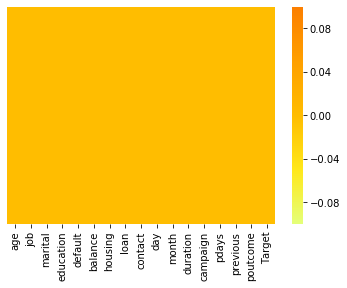

In [11]:
sns.heatmap(cust.isnull(), yticklabels=False, cmap="Wistia")

###### No Missing Value available
* As No Null value present. Hence the heatmap shows clean

### Univariate Analysis of the continuous variables

In [12]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(cust.age),stats.skew(cust.balance),stats.skew(cust.day),stats.skew(cust.duration)
                                      ,stats.skew(cust.campaign),stats.skew(cust.pdays) ,stats.skew(cust.previous)]},index=['age','balance','day','duration','campaign','pdays','previous'])
Skewness

,Skewness
age,0.684795
balance,8.360031
day,0.093076
duration,3.144214
campaign,4.898488
pdays,2.615629
previous,41.845066


##### Inference:
* balance, duration, campaign, pdays, previous data are highly skewed
* age and day are less skewed


#### 5 Point summary of numerical attributes

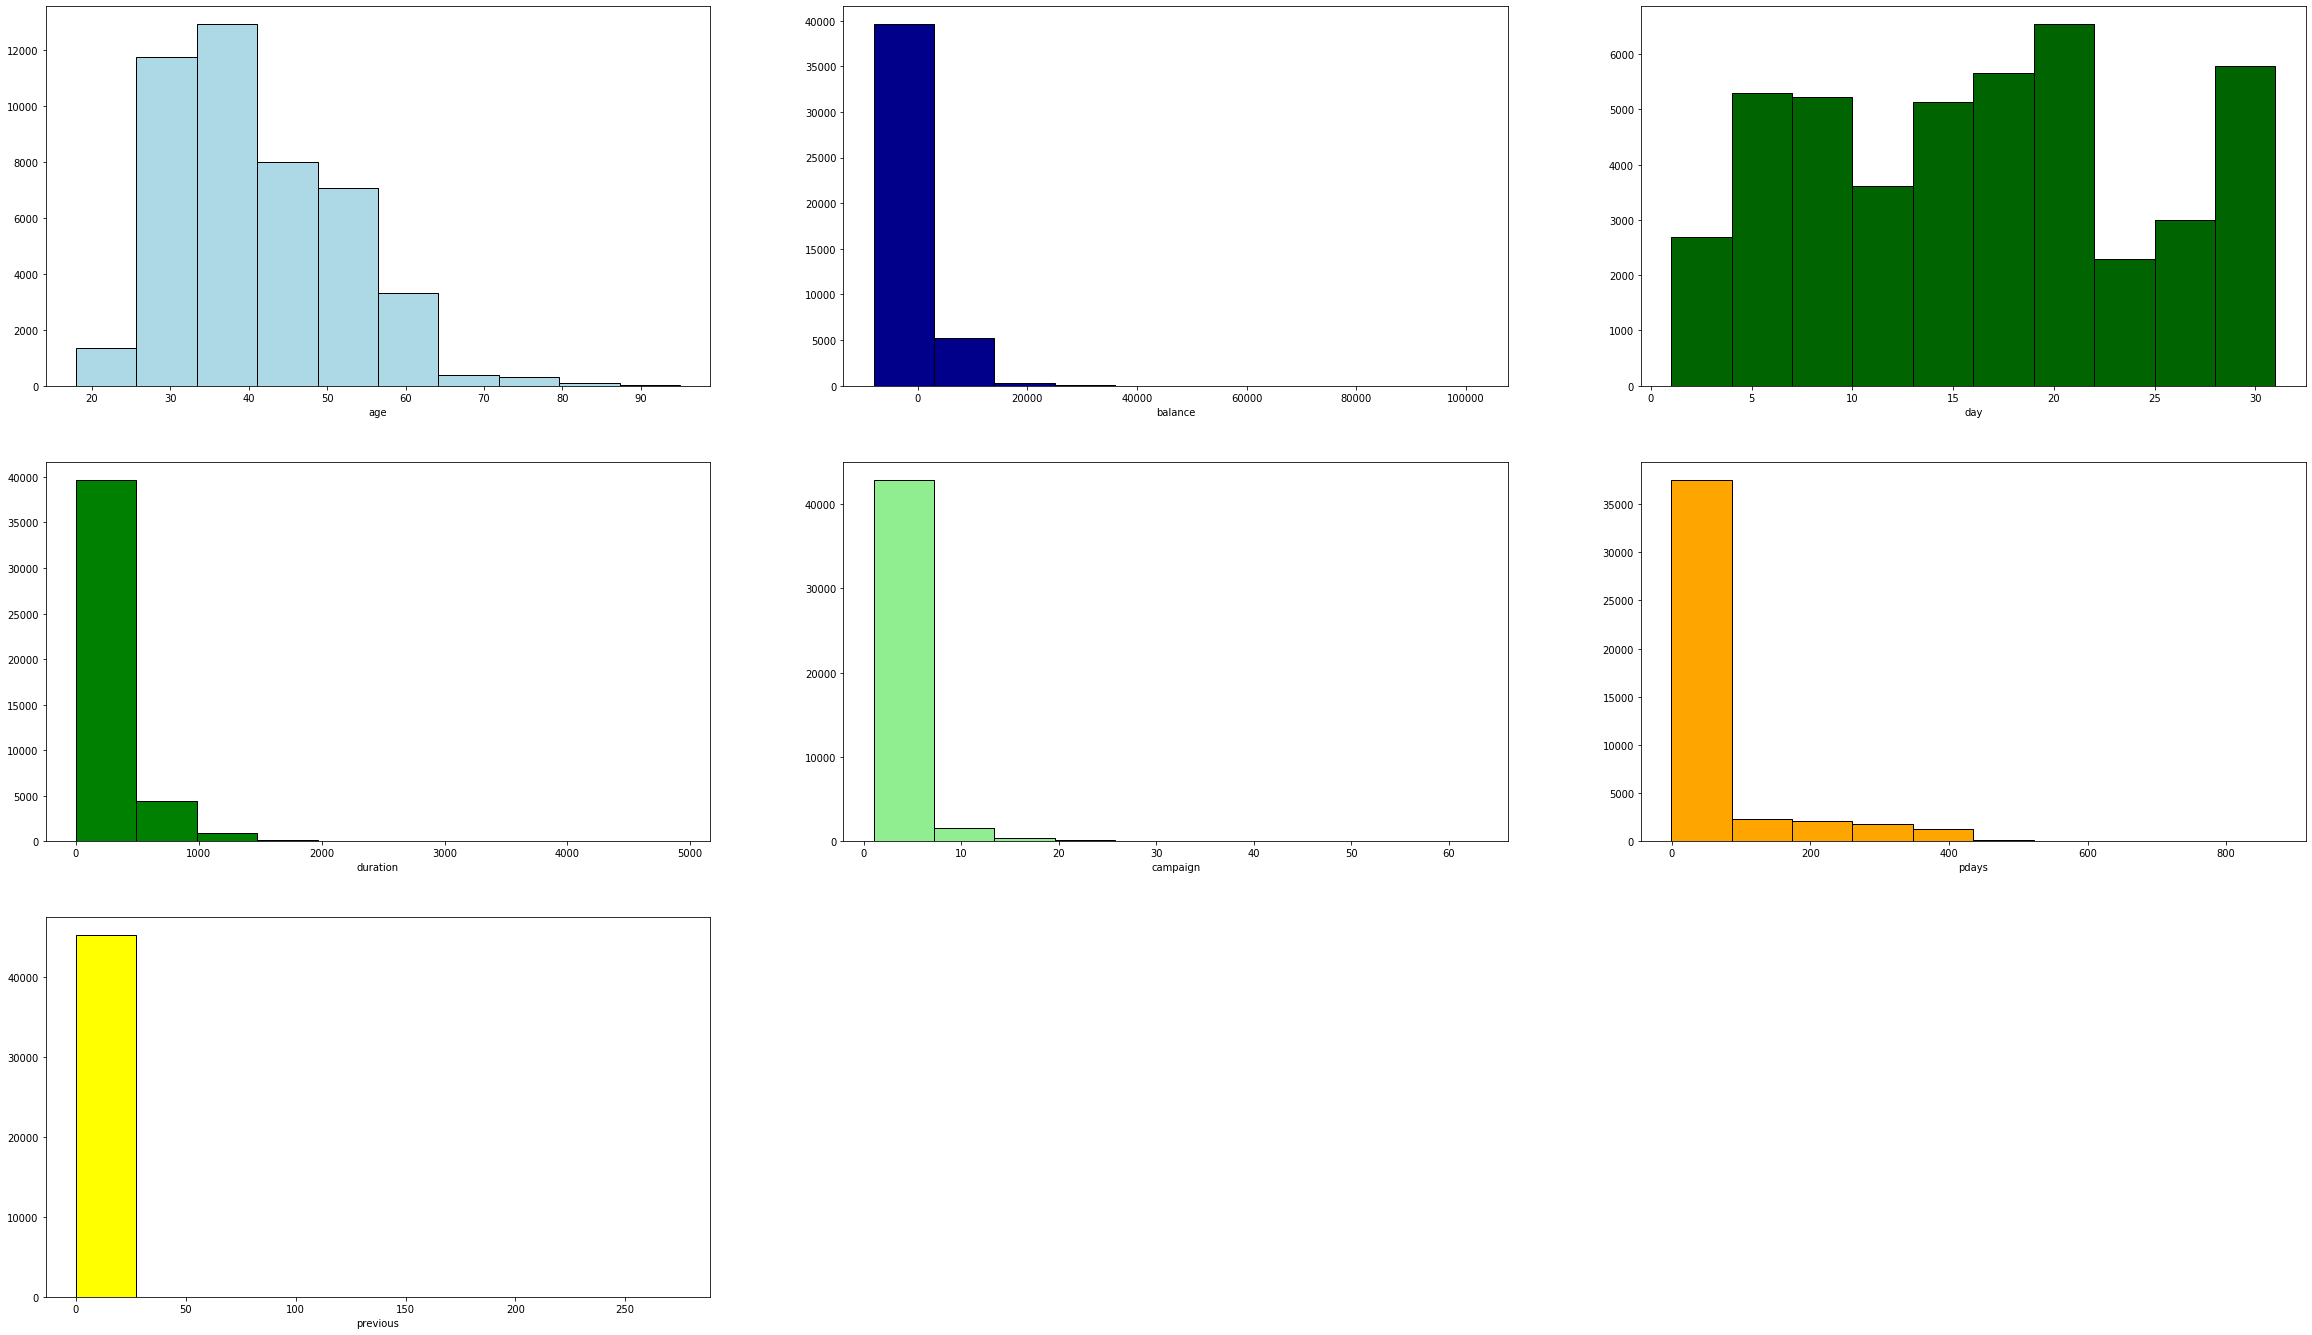

In [14]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(cust.age, color='lightblue', edgecolor = 'black')
plt.xlabel('age')

plt.subplot(5,3,2)
plt.hist(cust.balance, color='darkblue', edgecolor = 'black')
plt.xlabel('balance')

plt.subplot(5,3,3)
plt.hist(cust.day, color='darkgreen', edgecolor = 'black')
plt.xlabel('day')

plt.subplot(5,3,4)
plt.hist(cust.duration, color='green', edgecolor = 'black')
plt.xlabel('duration')

plt.subplot(5,3,5)
plt.hist(cust.campaign, color='lightgreen', edgecolor = 'black')
plt.xlabel('campaign')

plt.subplot(5,3,6)
plt.hist(cust.pdays, color='orange', edgecolor = 'black')
plt.xlabel('pdays')

plt.subplot(5,3,7)
plt.hist(cust.previous, color='yellow', edgecolor = 'black')
plt.xlabel('previous')
plt.show()

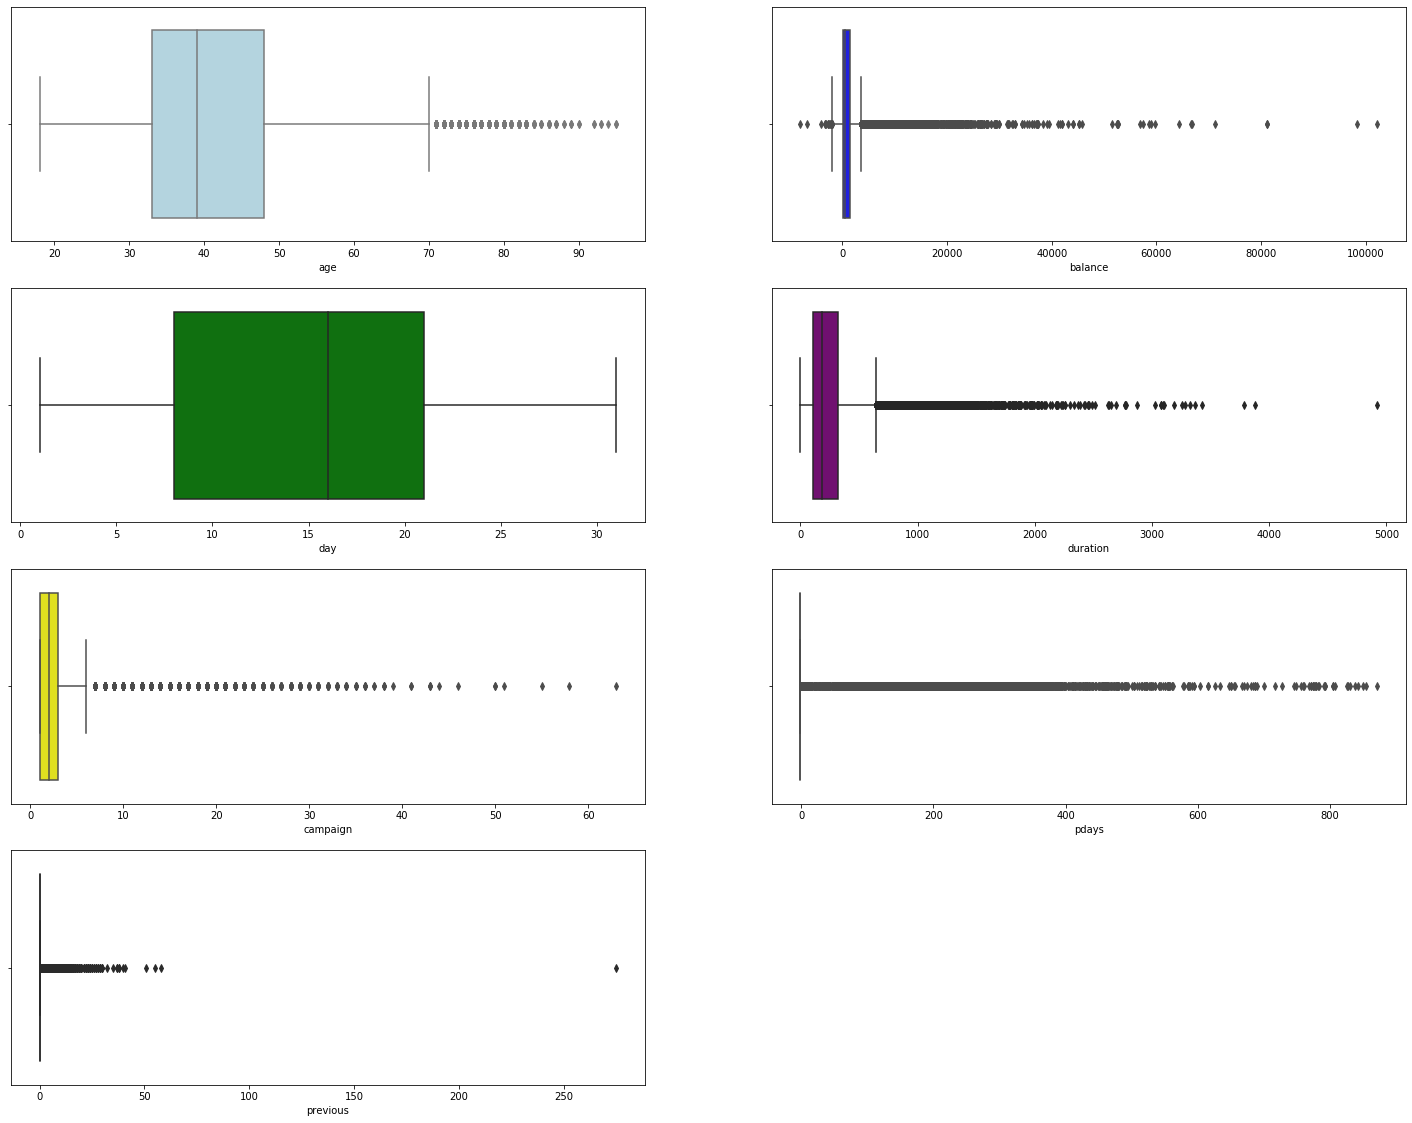

In [15]:
#Box plot 
plt.figure(figsize= (25,25))

plt.subplot(5,2,1)
sns.boxplot(x= cust.age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= cust.balance, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= cust.day, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= cust.duration, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= cust.campaign, color='yellow')

plt.subplot(5,2,6)
sns.boxplot(x= cust.pdays, color='orange')

plt.subplot(5,2,7)
sns.boxplot(x= cust.previous, color='darkblue')

##### Observations:
* Age data is Right tailed and more customers are from 33 to 48 yrs old. Therefire age data is right skewed
* For Age mean and median are almost same.
* Balance data is highly skewed. There is huge difference between mean and median. There are huge number of outliers present.
* Duration data is highly skewed. There is difference between mean and median. There are number of outliers present.
* Campaign, pdays and previous all are rightly skewed and have outliers present


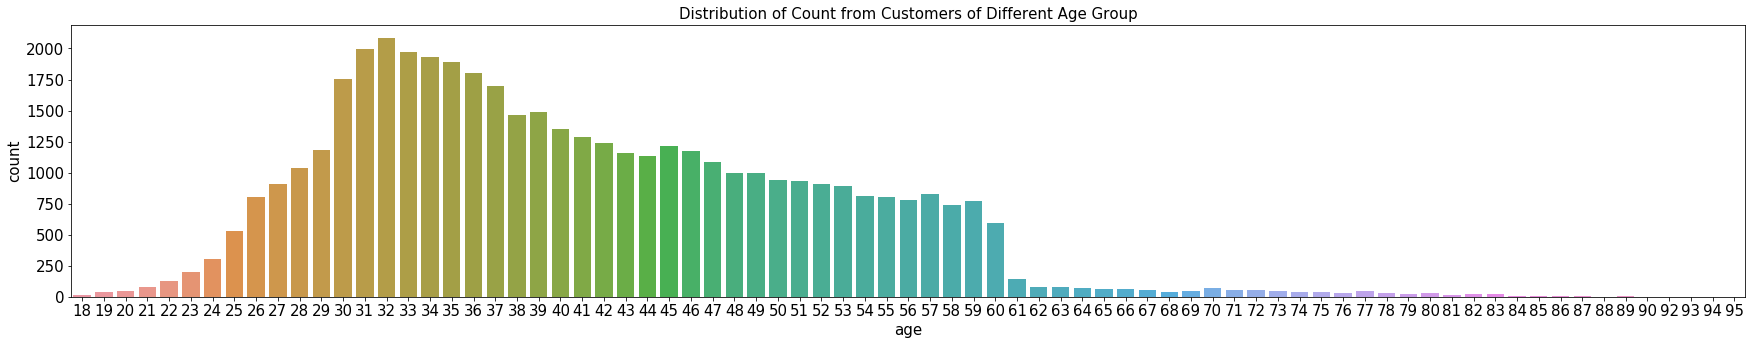

In [16]:
fig, ax=plt.subplots()
fig.set_size_inches(30,5)

#countplot
sns.countplot(cust['age'],data=cust)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers of Different Age Group', fontsize=15)
ax.tick_params(labelsize=15)

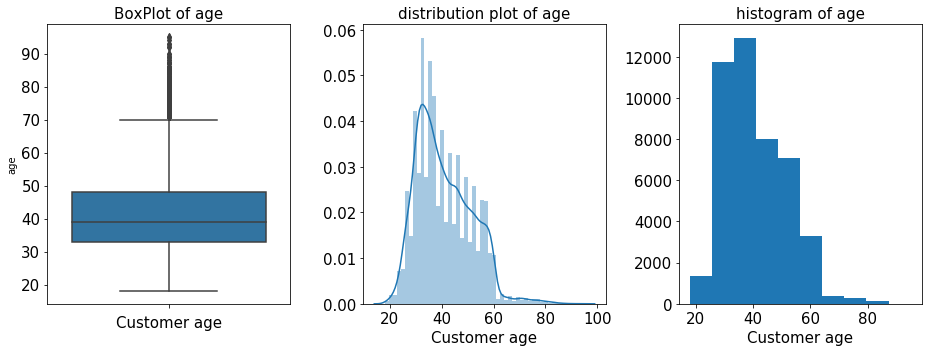

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=cust,orient='v',ax=ax1)
ax1.set_xlabel('Customer age', fontsize=15)
ax1.set_title('BoxPlot of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(cust['age'],ax=ax2)
ax2.set_xlabel('Customer age', fontsize=15)
ax2.set_title('distribution plot of age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(cust['age'])
ax3.set_xlabel('Customer age', fontsize=15)
ax3.set_title('histogram of age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Observation
* Age data is distributed as right skewed
* Mean and median are almost same
* Half of the customers fall in the range of 33 to 48 yrs old

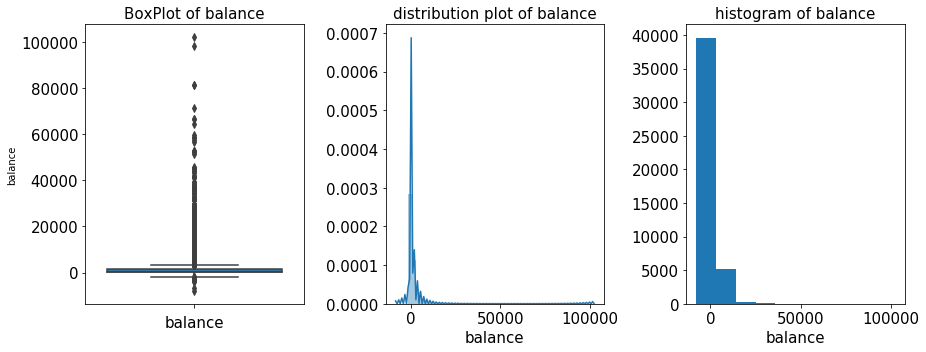

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=cust,orient='v',ax=ax1)
ax1.set_xlabel('balance', fontsize=15)
ax1.set_title('BoxPlot of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(cust['balance'],ax=ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_title('distribution plot of balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(cust['balance'])
ax3.set_xlabel('balance', fontsize=15)
ax3.set_title('histogram of balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Observation
* Balance data has long right tail
* Data has lot of outliers
* huge difference between mean and median

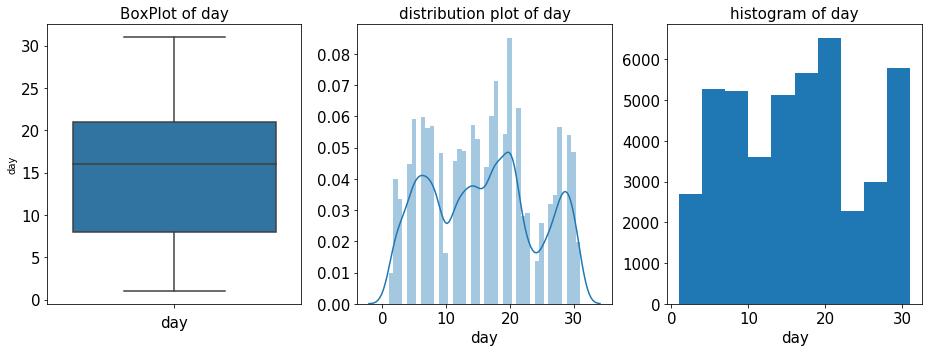

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='day',data=cust,orient='v',ax=ax1)
ax1.set_xlabel('day', fontsize=15)
ax1.set_title('BoxPlot of day', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(cust['day'],ax=ax2)
ax2.set_xlabel('day', fontsize=15)
ax2.set_title('distribution plot of day', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(cust['day'])
ax3.set_xlabel('day', fontsize=15)
ax3.set_title('histogram of day', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Observation
* Day data is evenly spread out and hence not much inference can be made out of this

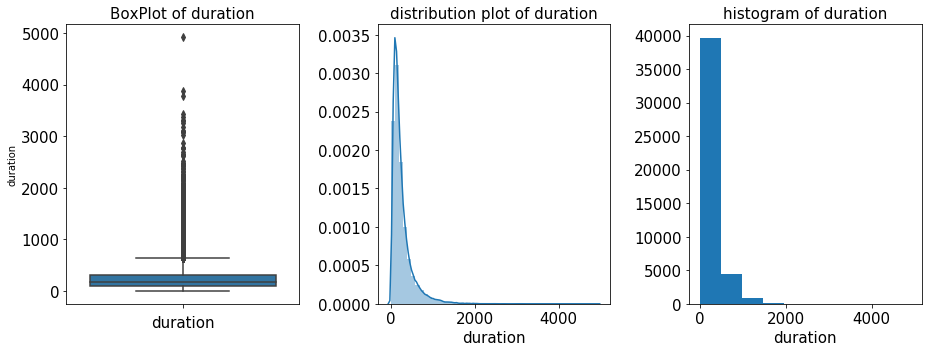

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=cust,orient='v',ax=ax1)
ax1.set_xlabel('duration', fontsize=15)
ax1.set_title('BoxPlot of duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(cust['duration'],ax=ax2)
ax2.set_xlabel('duration', fontsize=15)
ax2.set_title('distribution plot of duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(cust['duration'])
ax3.set_xlabel('duration', fontsize=15)
ax3.set_title('histogram of duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Observation
* Duration data has long right tail
* Data has lot of outliers
* Difference between mean and median

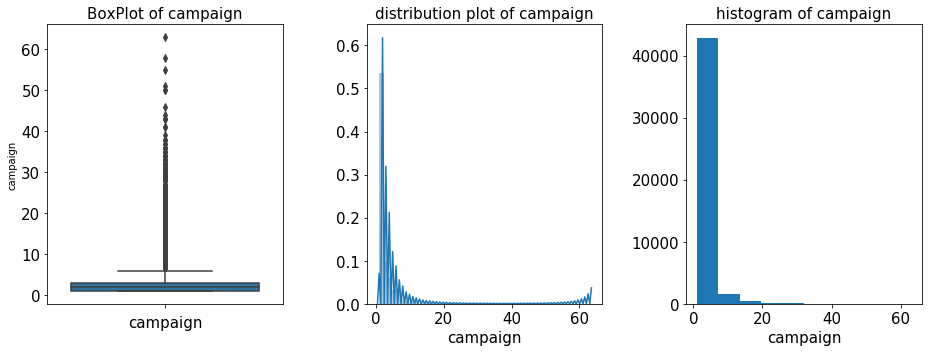

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='campaign',data=cust,orient='v',ax=ax1)
ax1.set_xlabel('campaign', fontsize=15)
ax1.set_title('BoxPlot of campaign', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(cust['campaign'],ax=ax2)
ax2.set_xlabel('campaign', fontsize=15)
ax2.set_title('distribution plot of campaign', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(cust['campaign'])
ax3.set_xlabel('campaign', fontsize=15)
ax3.set_title('histogram of campaign', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Observation
* Campaign data has long right tail
* Data has outliers present

### Univariate Analysis of the Categorical variables

Text(0.5, 1.0, 'Distribution based on poutcome')

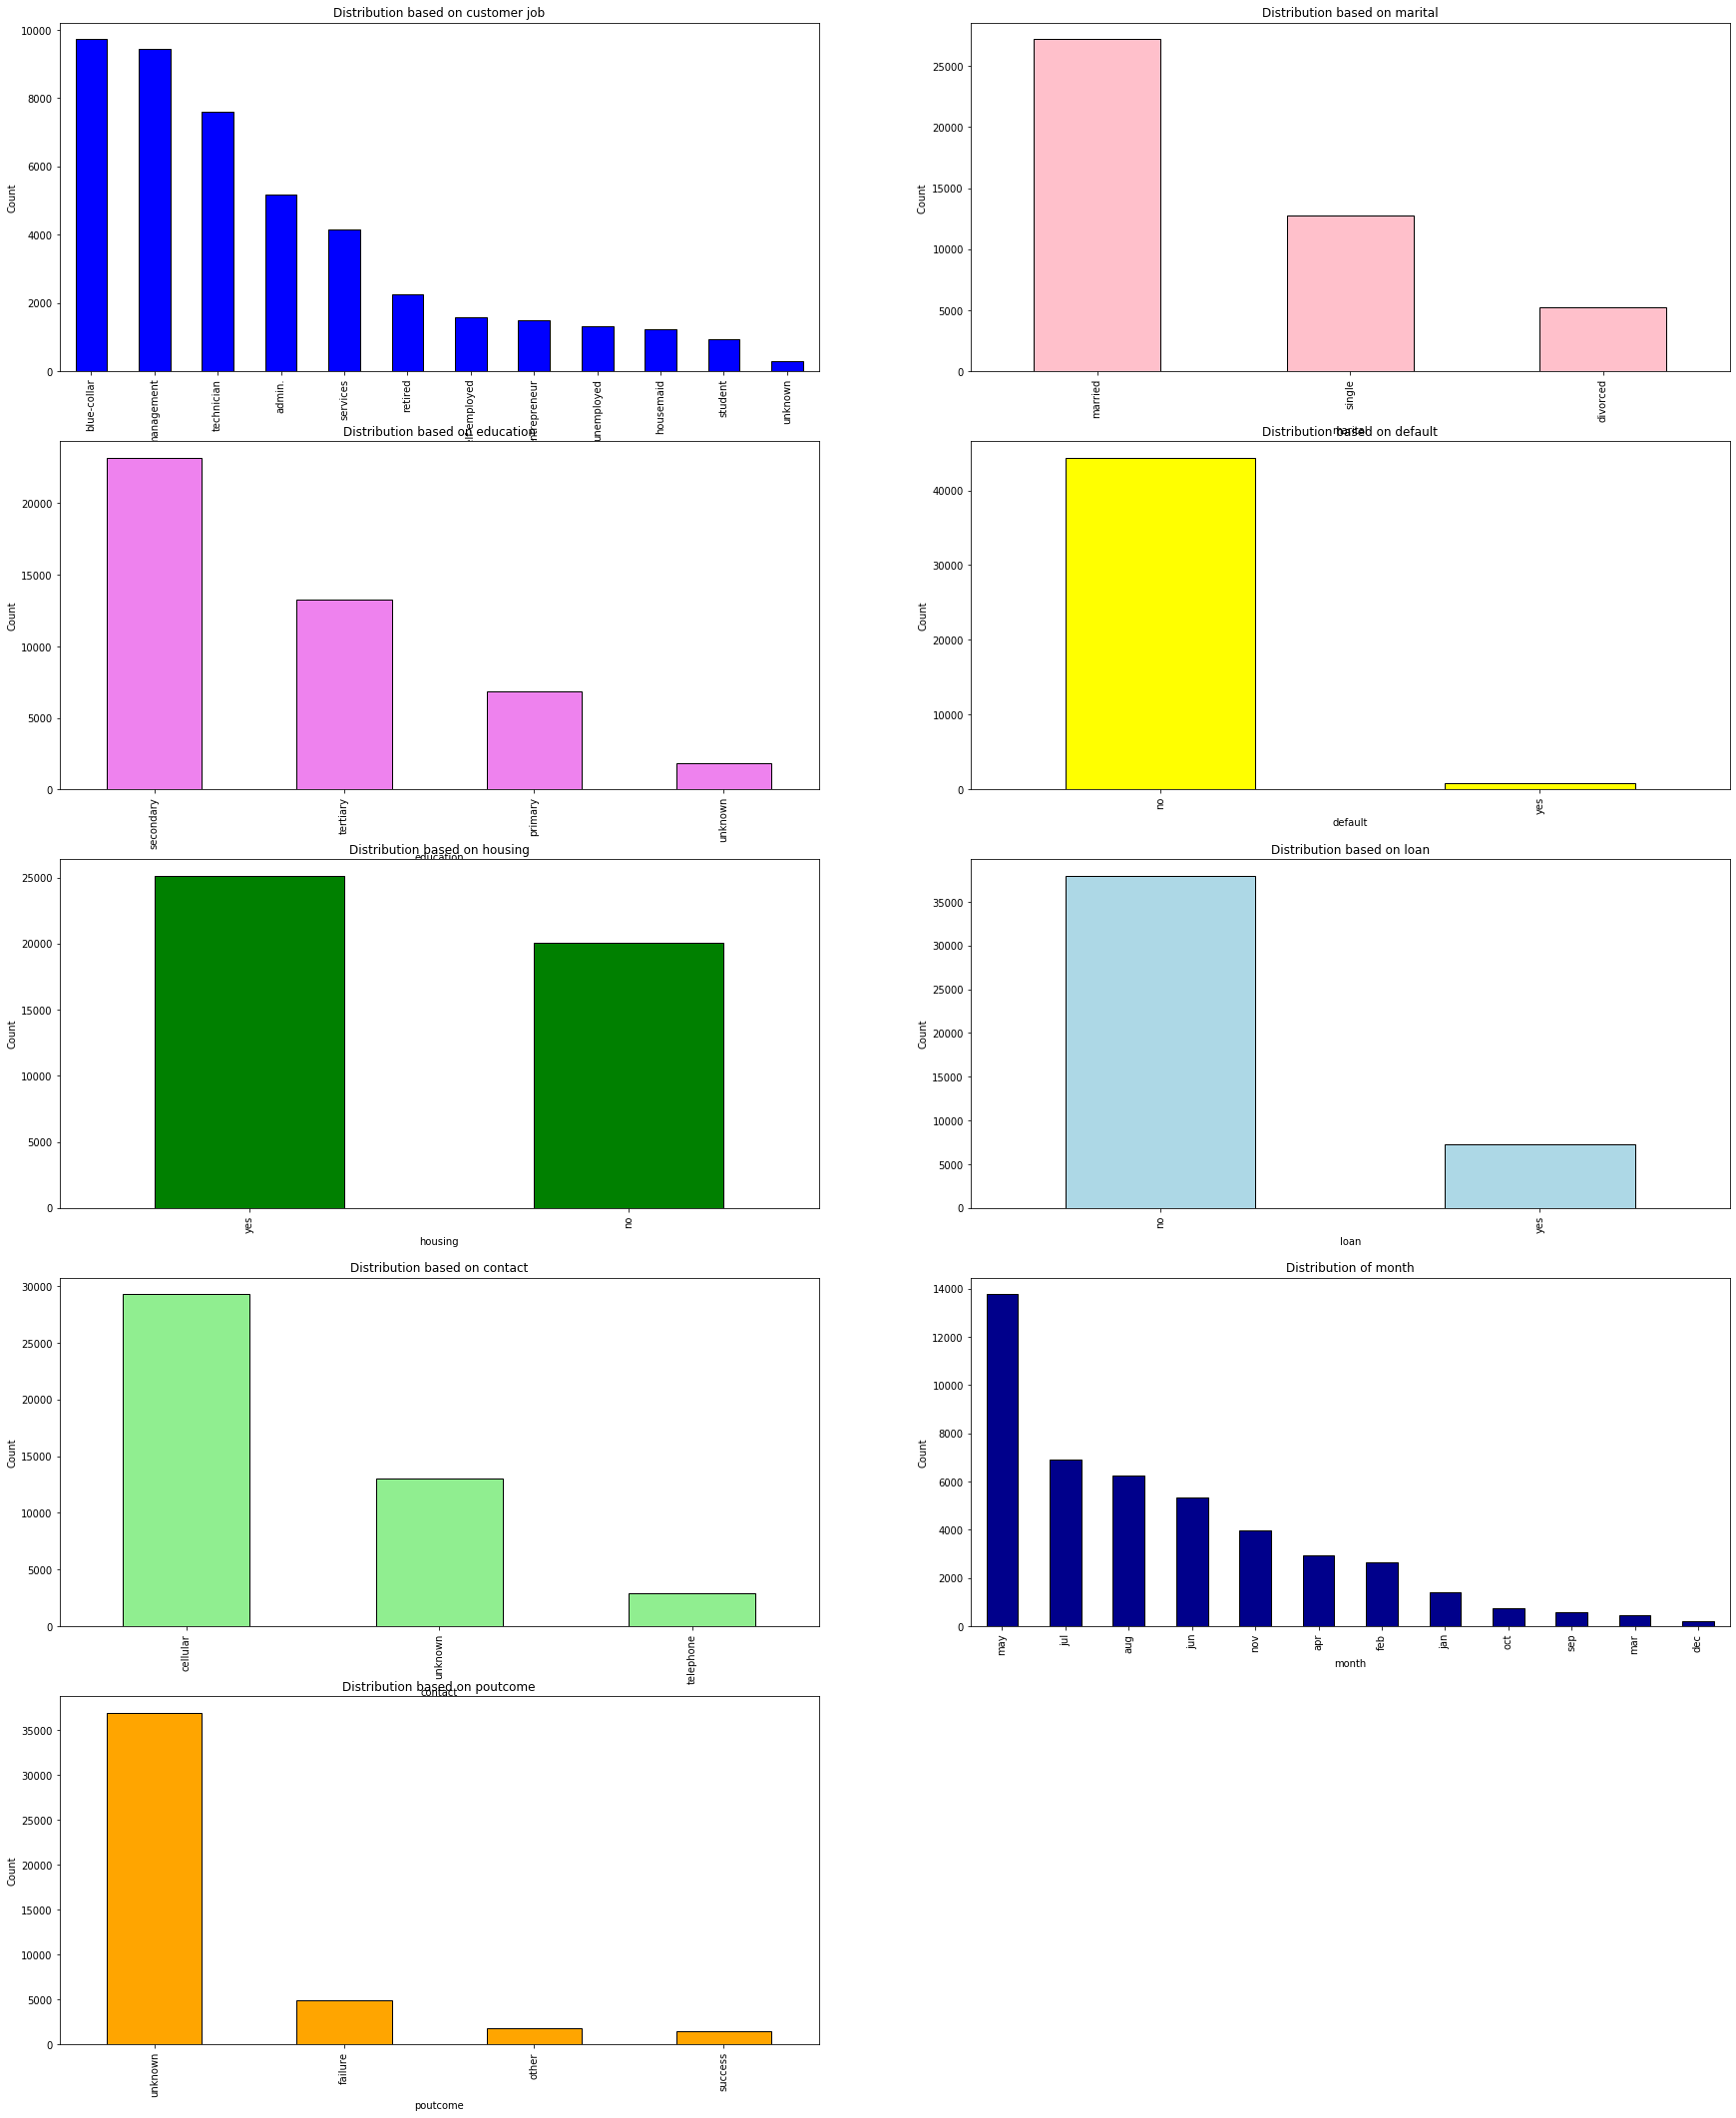

In [22]:
plt.figure(figsize=(30,45))

plt.subplot(6,2,1)
cust['job'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("job")
plt.ylabel("Count")
plt.title("Distribution based on customer job")

plt.subplot(6,2,2)
cust['marital'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('marital')
plt.ylabel('Count ')
plt.title('Distribution based on marital')


plt.subplot(6,2,3)
cust['education'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Distribution based on education')


plt.subplot(6,2,4)
cust['default'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('default')
plt.ylabel('Count')
plt.title("Distribution based on default")


plt.subplot(6,2,5)
cust['housing'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('housing')
plt.ylabel('Count')
plt.title("Distribution based on housing")


plt.subplot(6,2,6)
cust['loan'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('loan')
plt.ylabel('Count')
plt.title("Distribution based on loan")

plt.subplot(6,2,7)
cust['contact'].value_counts().plot(kind="bar", align='center',color = 'lightgreen',edgecolor = 'black')
plt.xlabel('contact')
plt.ylabel('Count')
plt.title("Distribution based on contact")

plt.subplot(6,2,8)
cust['month'].value_counts().plot(kind="bar", align='center',color = 'darkblue',edgecolor = 'black')
plt.xlabel('month')
plt.ylabel('Count')
plt.title("Distribution of month")

plt.subplot(6,2,9)
cust['poutcome'].value_counts().plot(kind="bar", align='center',color = 'orange',edgecolor = 'black')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title("Distribution based on poutcome")

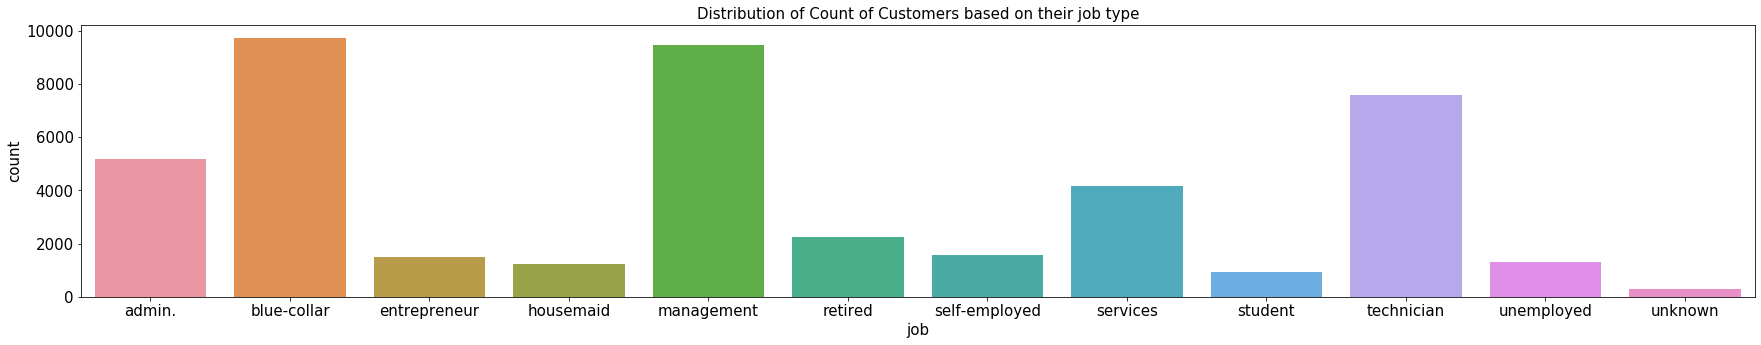

In [23]:
fig, ax=plt.subplots()
fig.set_size_inches(30,5)

#countplot
sns.countplot(cust['job'],data=cust)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on their job type', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Large number of customers from Management, blue-collar and technician job types
* Very less number of customers present who are student
* There are less number of entrepreneurs and self-employed customers present in the data set

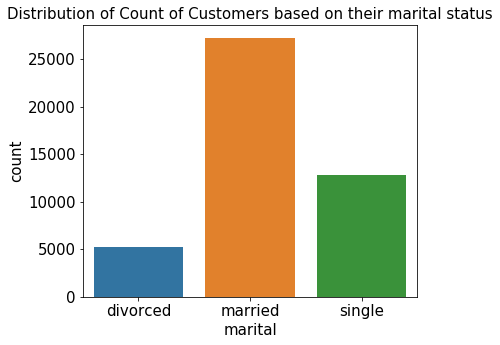

In [24]:
fig, ax=plt.subplots()
fig.set_size_inches(6,5)

#countplot
sns.countplot(cust['marital'],data=cust)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on their marital status', fontsize=15)
ax.tick_params(labelsize=15)

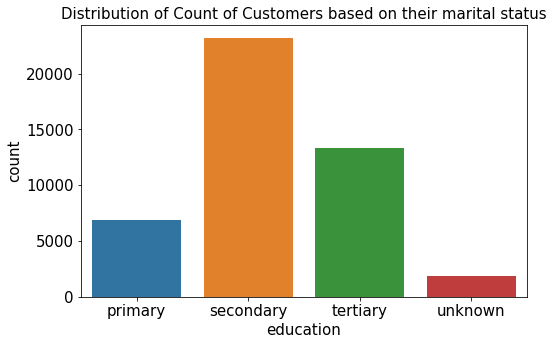

In [25]:
fig, ax=plt.subplots()
fig.set_size_inches(8,5)

#countplot
sns.countplot(cust['education'],data=cust)
ax.set_xlabel('education', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on their marital status', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers in the data set are mojority with a background of secondary education 

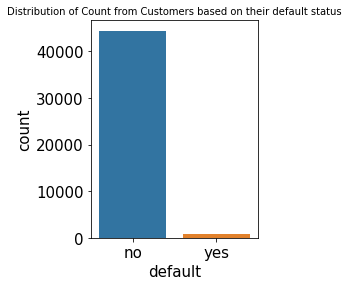

In [26]:
fig, ax=plt.subplots()
fig.set_size_inches(3,4)
#countplot
sns.countplot(cust['default'],data=cust)
ax.set_xlabel('default', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers based on their default status', fontsize=10)
ax.tick_params(labelsize=15)

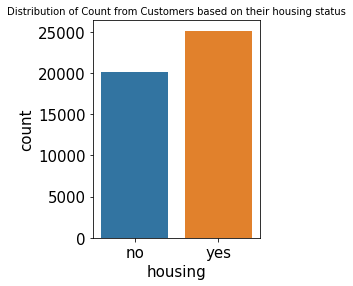

In [27]:
fig, ax=plt.subplots()
fig.set_size_inches(3,4)
#countplot
sns.countplot(cust['housing'],data=cust)
ax.set_xlabel('housing', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers based on their housing status', fontsize=10)
ax.tick_params(labelsize=15)

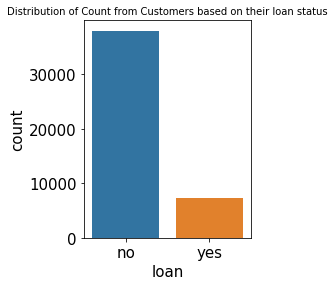

In [28]:
fig, ax=plt.subplots()
fig.set_size_inches(3,4)
#countplot
sns.countplot(cust['loan'],data=cust)
ax.set_xlabel('loan', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers based on their loan status', fontsize=10)
ax.tick_params(labelsize=15)

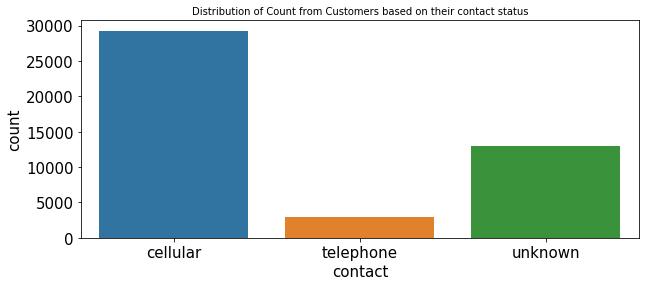

In [29]:
fig, ax=plt.subplots()
fig.set_size_inches(10,4)
#countplot
sns.countplot(cust['contact'],data=cust)
ax.set_xlabel('contact', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers based on their contact status', fontsize=10)
ax.tick_params(labelsize=15)

##### Observation
* Majority of the customers are contacted through cellular channel

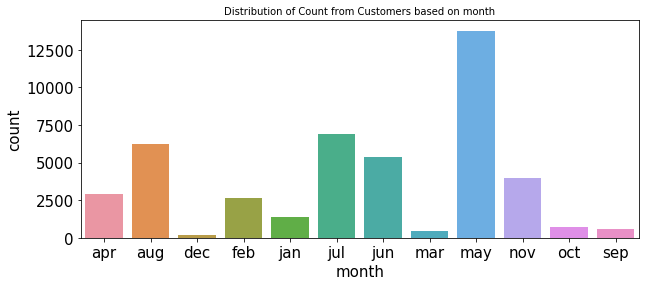

In [30]:
fig, ax=plt.subplots()
fig.set_size_inches(10,4)
#countplot
sns.countplot(cust['month'],data=cust)
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count from Customers based on month', fontsize=10)
ax.tick_params(labelsize=15)

##### Observation
* Majority of the contact established last was during mid of the year
* There are very few customers where contact was established during end of the year.

#### Target Variable or Dependent Variable

In [31]:
cust["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [32]:
print(cust.groupby('Target').size())
print('Percentage of client subscribed term deposit',(5289/39992)*100,'%')

Target
no     39922
yes     5289
dtype: int64
Percentage of client subscribed term deposit 13.2251450290058 %


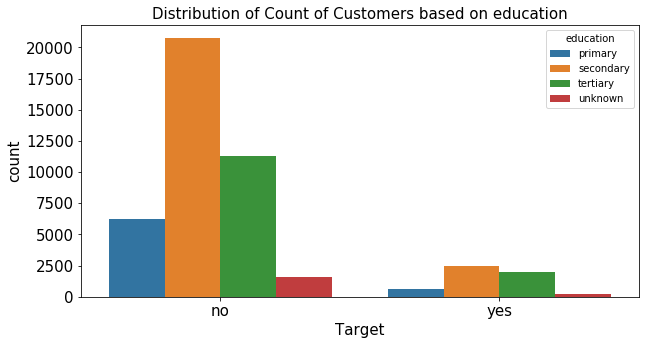

In [33]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['education'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on education', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers who subscribed Term Deposit are majority from secondary and tertiary education background
* Very few customers who subscribed Term Deposit from primary education background

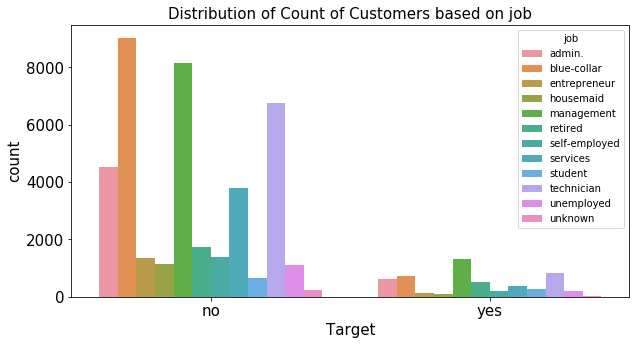

In [34]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['job'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on job', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers who subscribed Term Deposit are majority from management, blue-collar, admin and technician job type
* Very few customers who subscribed Term Deposit from entrepreneur, self-employed and housemaid job type

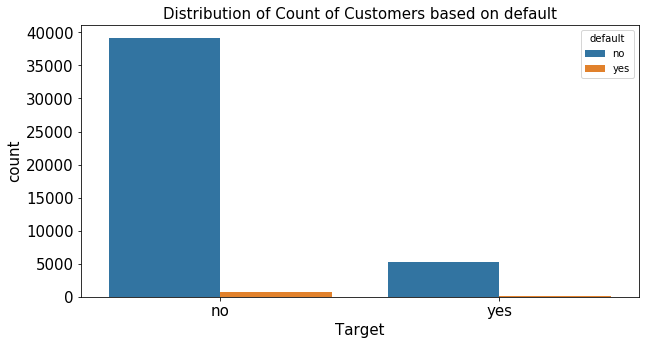

In [35]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['default'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on default', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers who subscribed Term Deposit are majority those who do not have any default in credit
* Very few customers who subscribed Term Deposit with credit default

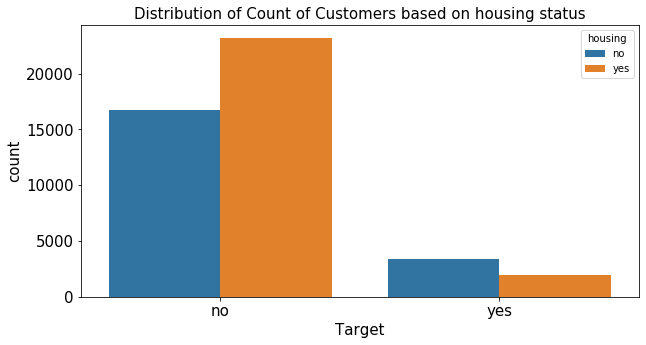

In [36]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['housing'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on housing status', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* More Customers who subscribed Term Deposit have no housing loan
* There are less customers who subscribed Term Deposit with housing loan

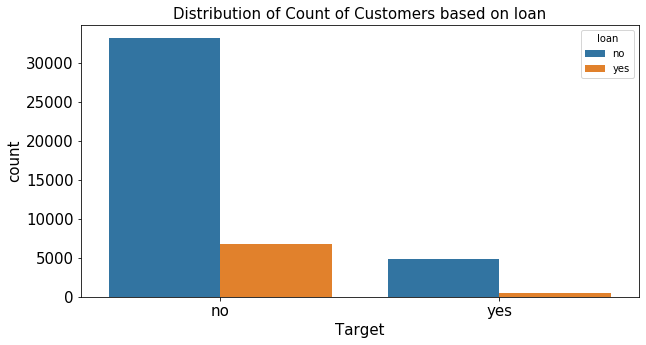

In [37]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['loan'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on loan', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers who subscribed Term Deposit are majority who do not have Personal Loan
* Very few customers who subscribed Term Deposit have personal loan

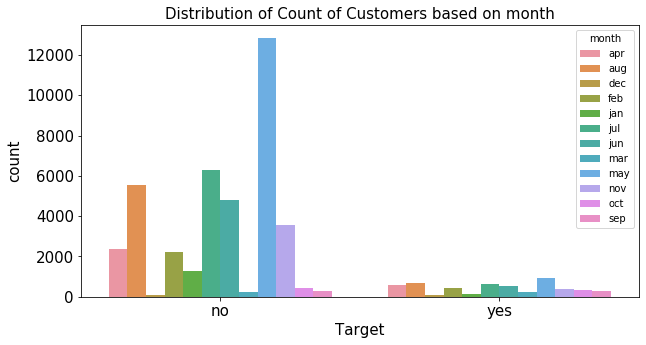

In [38]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['month'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on month', fontsize=15)
ax.tick_params(labelsize=15)

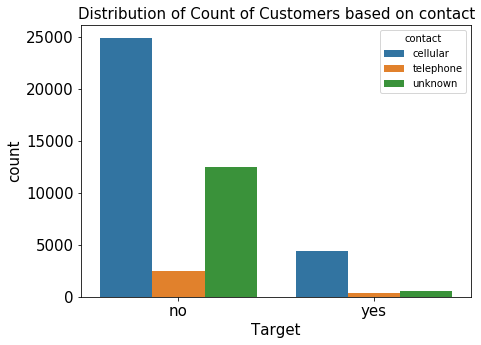

In [39]:
fig, ax=plt.subplots()
fig.set_size_inches(7,5)

#countplot
sns.countplot(cust['Target'],data=cust,hue=cust['contact'])
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('Distribution of Count of Customers based on contact', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation
* Customers who subscribed Term Deposit are majority were contacted through cellural channel
* Very few customers who subscribed Term Deposit were contacted through telephone or other channel

### Bivariate Analysis

In [40]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


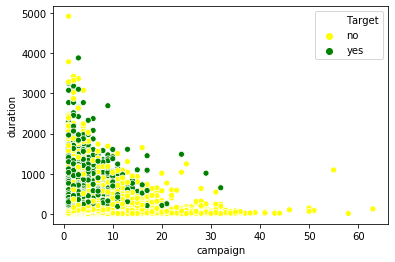

In [41]:
sns.scatterplot(cust.campaign, cust.duration, hue = cust['Target'], palette= ['yellow','green'])

##### Observation
* Clients with lesser number of contacts performed during this campaign had subscribed Term Deposit
* Clients with lesser duration of Calls are those who subscribed Term Deposit

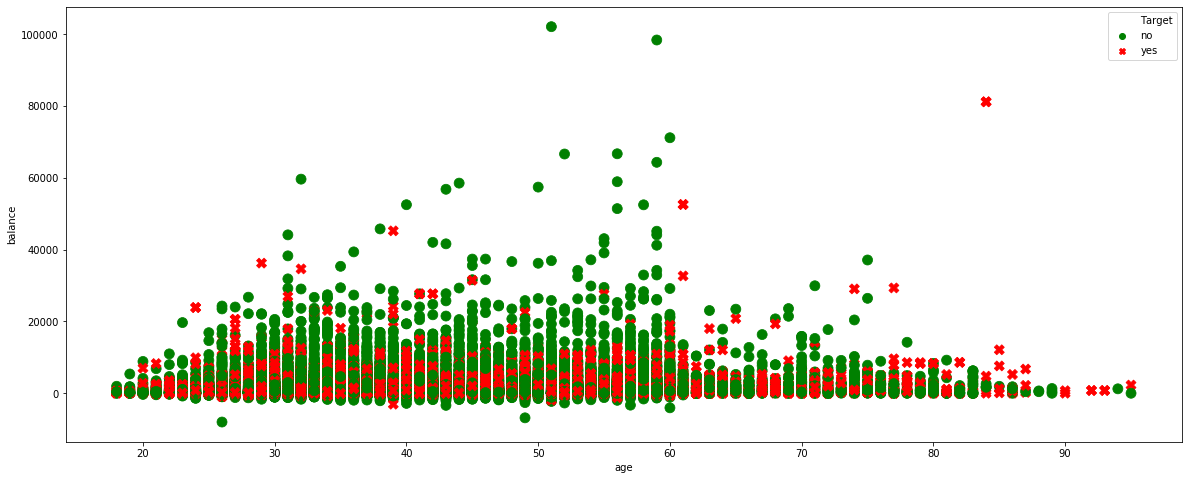

In [42]:
plt.figure(figsize=(20,8))
sns.scatterplot(cust.age, cust.balance, hue=cust['Target'], style=cust['Target'],sizes=(20, 200), palette = ['green','red'],s=100, color=".3", marker="+")

##### Observation
* Clients with lesser balance had subscribed more Term Deposit

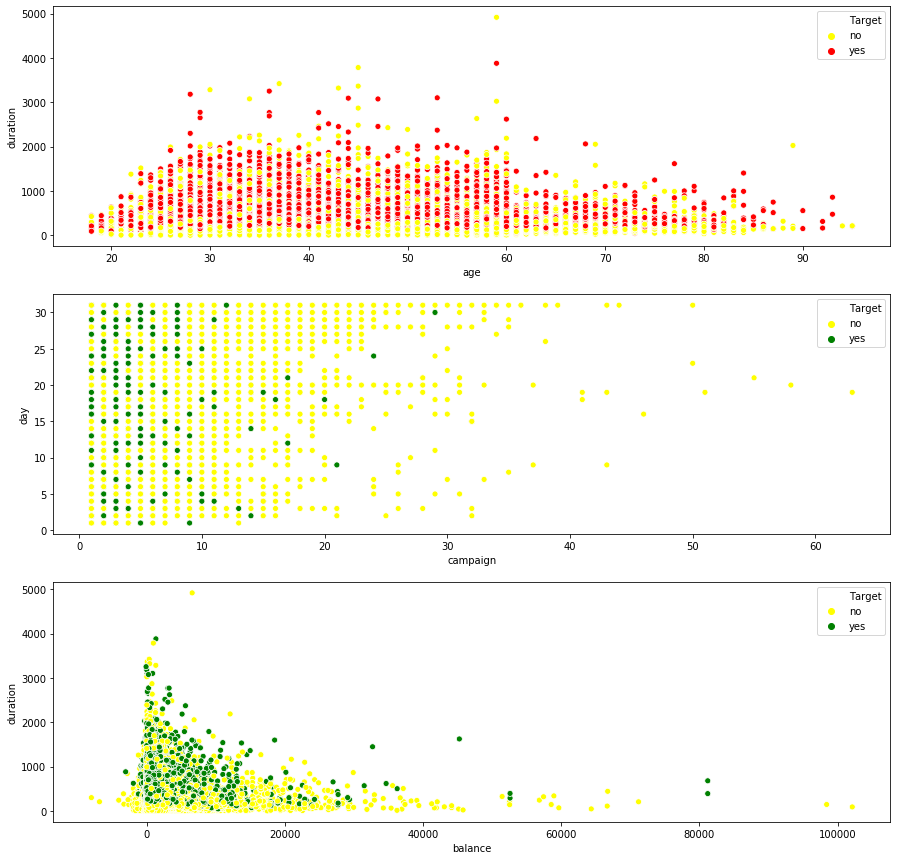

In [43]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(cust.age, cust.duration, hue = cust['Target'], palette= ['yellow','red'])

plt.subplot(3,1,2)
sns.scatterplot(cust.campaign, cust.day, hue = cust['Target'], palette= ['yellow','green'])

plt.subplot(3,1,3)
sns.scatterplot(cust.balance, cust.duration, hue = cust['Target'], palette= ['yellow','green'])

##### Observation
* Large number of Customers who subscribed Term Deposit had yearly average balance at lower range from below 1500
* Customers who subscribed Term Deposit have been contacted through less number of campaign
* Large number of Customers who subscribed Term Deposit had call for less duration which is roughly from 90 to 300 sec or 1.5 mins to 5 mins. 

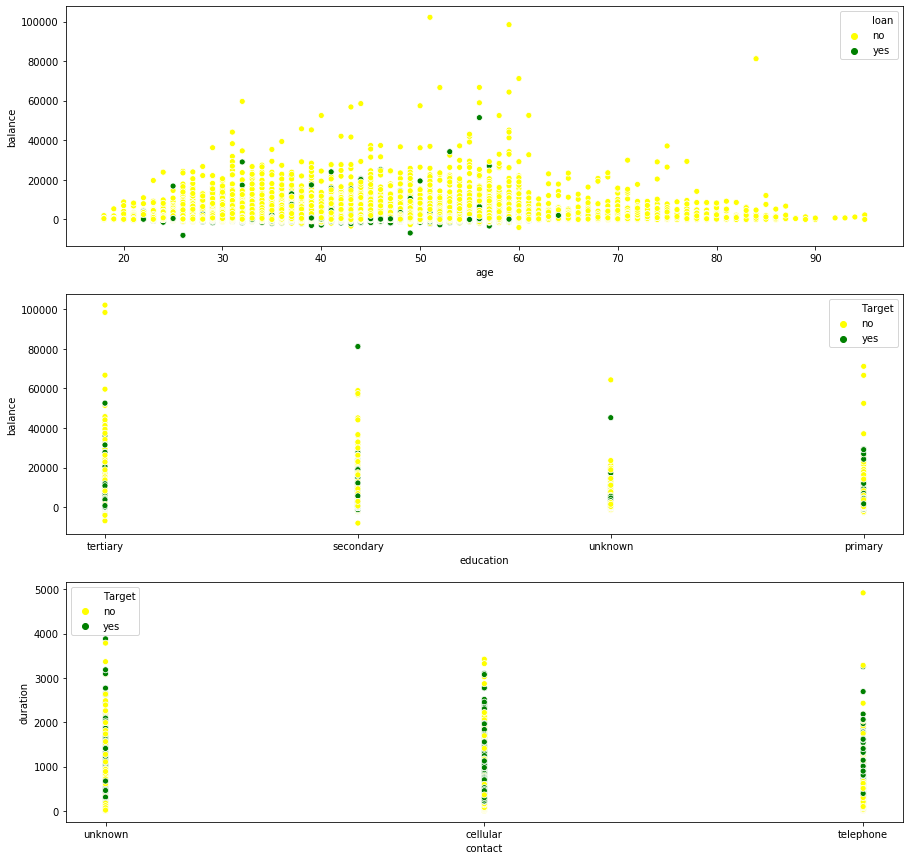

In [44]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(cust.age, cust.balance, hue = cust['loan'], palette= ['yellow','green'])

plt.subplot(3,1,2)
sns.scatterplot(cust.education, cust.balance, hue = cust['Target'], palette= ['yellow','green'])

plt.subplot(3,1,3)
sns.scatterplot(cust.contact, cust.duration, hue = cust['Target'], palette= ['yellow','green'])

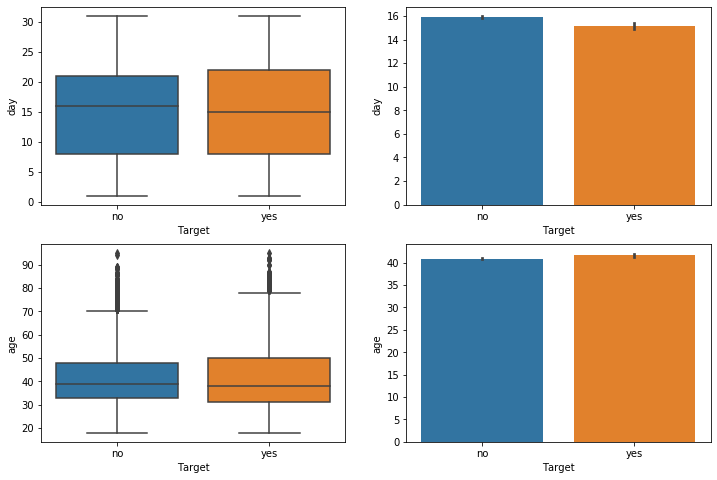

In [45]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x="Target", y="day", data=cust,ax=ax[0][0])
sns.barplot(x="Target", y="day", data=cust,ax=ax[0][1])
sns.boxplot(x="Target", y="age" , data=cust,ax=ax[1][0])
sns.barplot(x="Target", y="age", data=cust,ax=ax[1][1])

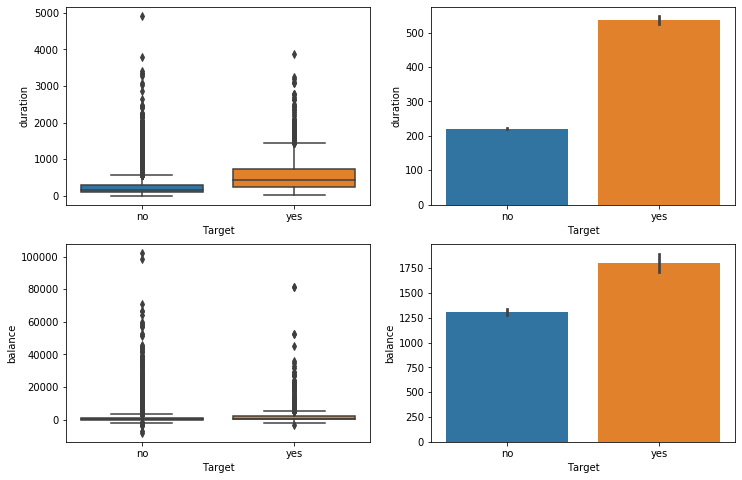

In [46]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x="Target", y="duration" , data=cust,ax=ax[0][0])
sns.barplot(x="Target", y="duration", data=cust,ax=ax[0][1])
sns.boxplot(x="Target", y="balance" , data=cust,ax=ax[1][0])
sns.barplot(x="Target", y="balance", data=cust,ax=ax[1][1])

##### Observation
* By and large Customers who subscribed Term Deposit had spent more duration than the ones who didn't subscribe
* Customers who subscribed Term Deposit have lesser yearly average bank balance than the customers who didn't subscribe

### Multivariate Analysis

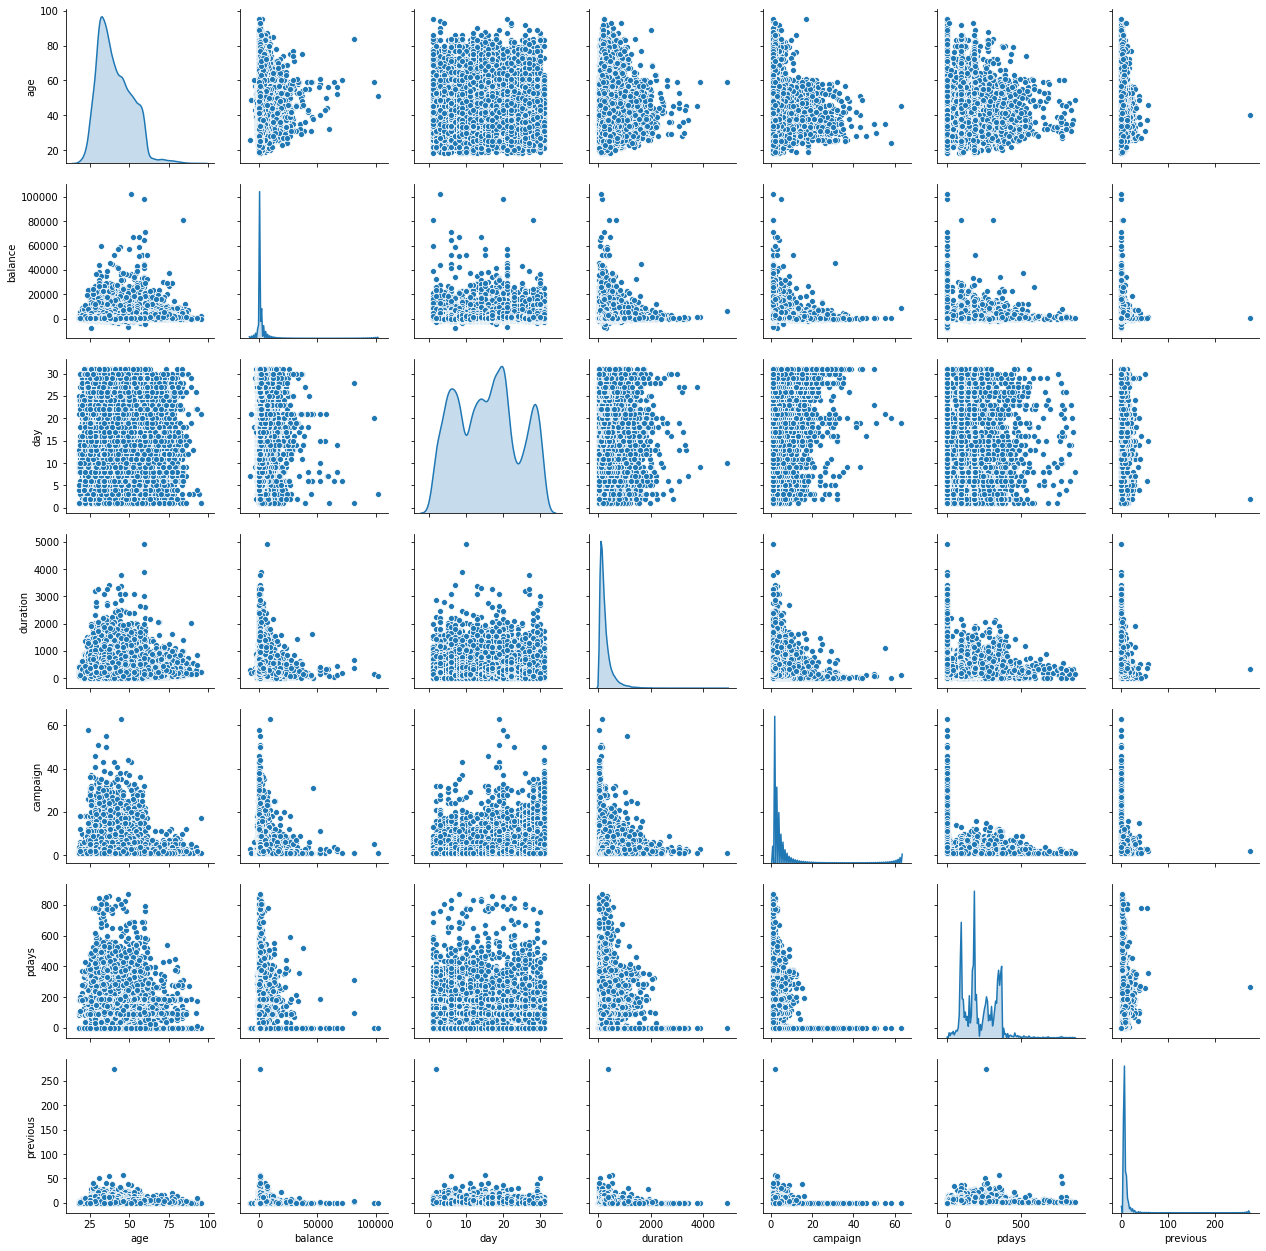

In [47]:
#Pairplot
sns.pairplot(cust.iloc[:,:],diag_kind='kde')
plt.show()

### Outlier Treatment

In [48]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [49]:
# Outlier Treatment of Balance feature
Q1=cust['balance'].quantile(q=0.25)
Q3=cust['balance'].quantile(q=0.75)
print('1st Quartile: ', Q1)
print('3st Quartile: ', Q3)
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', Lower_outliers)
print('Upper outliers in Balance: ', Upper_outliers)

upper_outlier_count= cust[cust['balance']>Upper_outliers]['balance'].count()
lower_outlier_count= cust[cust['balance']<-Lower_outliers]['balance'].count()
print('Number of outliers in Balance over upper quartile : ', upper_outlier_count)
print('Number of outliers in Balance below lower quartile: ', lower_outlier_count)
print('Outlier in Balance upper: ',round(upper_outlier_count*100/len(cust)), '%')
print('Outlier in Balancee lower: ',round(lower_outlier_count*100/len(cust)), '%')

bal_mean=cust['balance'].mean()
bal_median=cust['balance'].median()
print('Mean value: ', bal_mean)      
print('Median value: ',bal_median)

1st Quartile:  72.0
3st Quartile:  1428.0
Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0
Number of outliers in Balance over upper quartile :  4712
Number of outliers in Balance below lower quartile:  36552
Outlier in Balance upper:  10.0 %
Outlier in Balancee lower:  81.0 %
Mean value:  1362.2720576850766
Median value:  448.0


In [50]:
cust['balance']=np.where(((cust['balance']<Lower_outliers) | (cust['balance']>Upper_outliers)),bal_median, cust['balance'])

In [51]:
# Outlier Treatment of duration feature
dur_Q1=cust['duration'].quantile(q=0.25)
dur_Q3=cust['duration'].quantile(q=0.75)
print('1st Quartile: ', dur_Q1)
print('3st Quartile: ', dur_Q3)
Lower_outliers=dur_Q1-1.5*(dur_Q3-dur_Q1)
Upper_outliers=dur_Q3+1.5*(dur_Q3-dur_Q1)
print('Lower outliers in duration: ', Lower_outliers)
print('Upper outliers in duration: ', Upper_outliers)

upper_outlier_count= cust[cust['duration']>Upper_outliers]['duration'].count()
lower_outlier_count= cust[cust['duration']<-Lower_outliers]['duration'].count()
print('Number of outliers in duration over upper quartile : ', upper_outlier_count)
print('Number of outliers in duration below lower quartile: ', lower_outlier_count)
print('Outlier in duration upper: ',round(upper_outlier_count*100/len(cust)), '%')
print('Outlier in duration lower: ',round(lower_outlier_count*100/len(cust)), '%')

dur_mean=cust['duration'].mean()
dur_median=cust['duration'].median()
print('Mean value: ', dur_mean)      
print('Median value: ',dur_median)

1st Quartile:  103.0
3st Quartile:  319.0
Lower outliers in duration:  -221.0
Upper outliers in duration:  643.0
Number of outliers in duration over upper quartile :  3235
Number of outliers in duration below lower quartile:  26914
Outlier in duration upper:  7.0 %
Outlier in duration lower:  60.0 %
Mean value:  258.1630797814691
Median value:  180.0


In [52]:
cust['duration']=np.where(((cust['duration']<Lower_outliers) | (cust['duration']>Upper_outliers)),dur_median, cust['duration'])

In [53]:
# Outlier Treatment of campaign feature
dur_Q1=cust['campaign'].quantile(q=0.25)
dur_Q3=cust['campaign'].quantile(q=0.75)
print('1st Quartile: ', dur_Q1)
print('3st Quartile: ', dur_Q3)
Lower_outliers=dur_Q1-1.5*(dur_Q3-dur_Q1)
Upper_outliers=dur_Q3+1.5*(dur_Q3-dur_Q1)
print('Lower outliers in campaign: ', Lower_outliers)
print('Upper outliers in campaign: ', Upper_outliers)

upper_outlier_count= cust[cust['campaign']>Upper_outliers]['campaign'].count()
lower_outlier_count= cust[cust['campaign']<-Lower_outliers]['campaign'].count()
print('Number of outliers in campaign over upper quartile : ', upper_outlier_count)
print('Number of outliers in campaign below lower quartile: ', lower_outlier_count)
print('Outlier in campaign upper: ',round(upper_outlier_count*100/len(cust)), '%')
print('Outlier in campaign lower: ',round(lower_outlier_count*100/len(cust)), '%')

camp_mean=cust['campaign'].mean()
camp_median=cust['campaign'].median()
print('Mean value: ', camp_mean)      
print('Median value: ',camp_median)

1st Quartile:  1.0
3st Quartile:  3.0
Lower outliers in campaign:  -2.0
Upper outliers in campaign:  6.0
Number of outliers in campaign over upper quartile :  3064
Number of outliers in campaign below lower quartile:  17544
Outlier in campaign upper:  7.0 %
Outlier in campaign lower:  39.0 %
Mean value:  2.763840658246887
Median value:  2.0


In [54]:
cust['campaign']=np.where(((cust['campaign']<Lower_outliers) | (cust['campaign']>Upper_outliers)),dur_median, cust['campaign'])

In [55]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,620.486784,801.223453,-1944.0,73.0,448.0,869.0,3462.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,201.810090,135.808967,0.0,103.0,180.0,265.0,643.0
campaign,45211.0,14.184402,44.726664,1.0,1.0,2.0,3.0,180.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### correlation matrix 

In [56]:
cust.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.082774,-0.009120,-0.017697,0.004579,-0.023758,0.001288
balance,0.082774,1.000000,-0.001177,0.023007,-0.018551,0.027592,0.032662
day,-0.009120,-0.001177,1.000000,-0.046708,0.130943,-0.093044,-0.051710
duration,-0.017697,0.023007,-0.046708,1.000000,-0.121159,0.022757,0.017051
campaign,0.004579,-0.018551,0.130943,-0.121159,1.000000,-0.067544,-0.027432
pdays,-0.023758,0.027592,-0.093044,0.022757,-0.067544,1.000000,0.454820
previous,0.001288,0.032662,-0.051710,0.017051,-0.027432,0.454820,1.000000


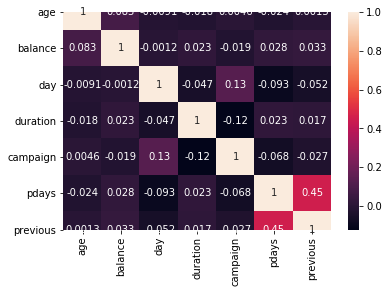

In [57]:
sns.heatmap(cust.corr(), annot = True)

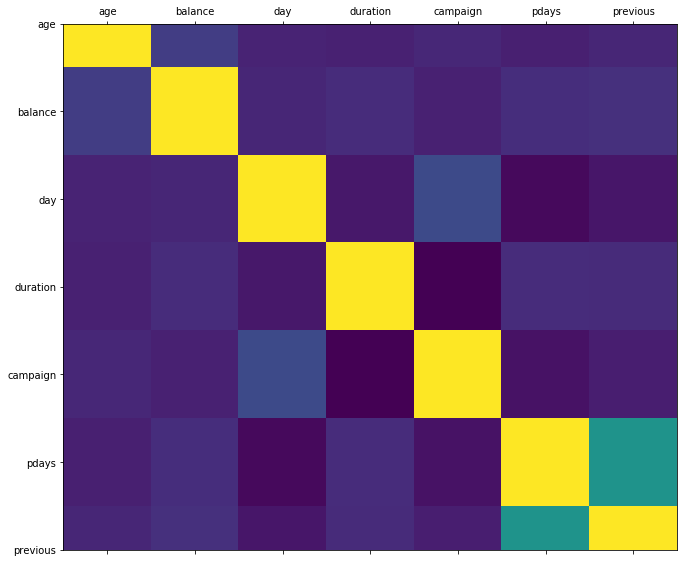

In [58]:
#Graphical representation of the Corelation matrix in a heatmap
def plot_corr(cust, size=11):
    corr = cust.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(cust)

* In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. 

Text(0.5, 1, 'Correlation Matrix of Data')

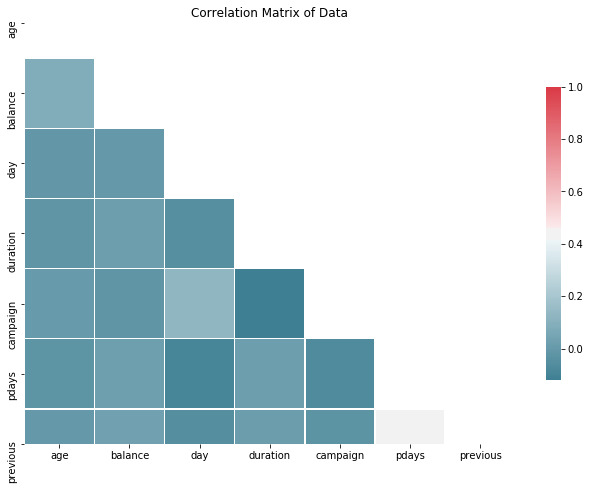

In [59]:
# Correlation matrix for all variables
corr = cust.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .6})#, annot = True)
ax.set_title('Correlation Matrix of Data')

##### Observation
* There is no significant relationship between any two variables
* Day and campaign has slightly higher correlation
* pdays and previous has also higher correlation

### Encoding Categorical Variables

In [60]:
print(cust.job.value_counts())
print(cust.marital.value_counts())
print(cust.education.value_counts())
print(cust.default.value_counts())
print(cust.housing.value_counts())
print(cust.loan.value_counts())
print(cust.contact.value_counts())
print(cust.month.value_counts())
print(cust.poutcome.value_counts())
print(cust.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [61]:
cust.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [62]:
replaceStruct = {
                "education":   {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 },
                "loan":        {"no": 0, "yes": 1 },
                "contact":     {"cellular": 1, "telephone": 2, "unknown":-1},
                "poutcome":    {"success": 1, "failure": 2,"other": 3,"unknown": -1},    
                "Target":      {"no": 0, "yes": 1 }
                    }
                    
oneHotCols=["job","marital","month"]

In [63]:
cust=cust.replace(replaceStruct)
cust=pd.get_dummies(cust, columns=oneHotCols)
cust.head(10)

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143.0,1,0,-1,5,261.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29.0,1,0,-1,5,151.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2.0,1,1,-1,5,76.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,47,-1,0,1506.0,1,0,-1,5,92.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,33,-1,0,1.0,0,0,-1,5,198.0,1.0,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231.0,1,0,-1,5,139.0,1.0,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447.0,1,1,-1,5,217.0,1.0,...,0,0,0,0,0,0,1,0,0,0
7,42,3,1,2.0,1,0,-1,5,380.0,1.0,...,0,0,0,0,0,0,1,0,0,0
8,58,1,0,121.0,1,0,-1,5,50.0,1.0,...,0,0,0,0,0,0,1,0,0,0
9,43,2,0,593.0,1,0,-1,5,55.0,1.0,...,0,0,0,0,0,0,1,0,0,0


##### To be noted - 
* New categorical columns are added post encoding
* Total number of columns are 41 where 40 are independent variables and 1 dependent variable which is 'Target' column
* Now data set is ready for scalling and splitting for training & test data set

In [64]:
cust.dtypes

age                    int64
education              int64
default                int64
balance              float64
housing                int64
loan                   int64
contact                int64
day                    int64
duration             float64
campaign             float64
pdays                  int64
previous               int64
poutcome               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul     

## Training and making predictions using standard classification algorithms

#### Split data and creating the training set and test set in ration of 70:30

In [65]:
X = cust.drop('Target',axis=1)  #Independent Variables
y = cust['Target']  #Dependent Variable or Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Performing Feature Scaling on the Data
* This ensures all variables scales down to standard normal distributon

In [66]:
X_train=pd.DataFrame(X_train).apply(zscore)
X_test=pd.DataFrame(X_test).apply(zscore)

In [67]:
print(X_train.shape)
print(y_train.shape)

(31647, 40)
(31647,)


In [68]:
print(X_test.shape)
print(y_test.shape)

(13564, 40)
(13564,)


In [69]:
X_test

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3610,0.098817,-1.114359,-0.134211,2.386960,0.897711,-0.439754,-1.506344,-0.099732,0.442979,-0.228745,...,-0.07254,-0.245831,-0.179633,-0.419525,-0.368929,-0.106457,1.512167,-0.307103,-0.127806,-0.109944
11677,-0.371515,-0.021117,-0.134211,1.997687,-1.113944,-0.439754,-1.506344,0.499739,-0.259422,-0.273308,...,-0.07254,-0.245831,-0.179633,-0.419525,2.710549,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
33018,-0.841847,-0.021117,-0.134211,0.382829,0.897711,-0.439754,0.535738,0.140056,-0.163304,-0.228745,...,-0.07254,-0.245831,-0.179633,-0.419525,-0.368929,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
44323,1.133547,-1.114359,-0.134211,-0.391951,-1.113944,-0.439754,0.535738,1.458894,1.374584,-0.251027,...,-0.07254,-0.245831,-0.179633,2.383647,-0.368929,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
8119,-0.841847,1.072125,-0.134211,-0.453481,0.897711,-0.439754,-1.506344,-1.658359,-0.141123,-0.206463,...,-0.07254,-0.245831,-0.179633,-0.419525,2.710549,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,-0.183382,-0.021117,-0.134211,1.598367,-1.113944,-0.439754,-1.506344,0.140056,-0.407296,-0.295590,...,-0.07254,-0.245831,-0.179633,-0.419525,2.710549,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
28752,0.569149,1.072125,-0.134211,2.363102,-1.113944,-0.439754,0.535738,1.698683,0.280318,-0.295590,...,-0.07254,-0.245831,5.566917,-0.419525,-0.368929,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
22657,-0.935913,1.072125,-0.134211,-0.776201,-1.113944,-0.439754,0.535738,1.099211,-0.081973,-0.206463,...,-0.07254,-0.245831,-0.179633,-0.419525,-0.368929,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944
12529,0.851348,-0.021117,-0.134211,-0.769923,-1.113944,-0.439754,-1.506344,-1.538464,-1.316720,-0.295590,...,-0.07254,-0.245831,-0.179633,2.383647,-0.368929,-0.106457,-0.661303,-0.307103,-0.127806,-0.109944


### Logistic Regression

In [70]:
logmodel= LogisticRegression() #Build the logistic regression model & instantiate learning model
logmodel=logmodel.fit(X_train, y_train) #Fitting the model
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_predict= logmodel.predict(X_test) # predict the test set results

In [72]:
# Training score to check accuracy of model
score_train = logmodel.score(X_train, y_train)
print(round(score_train*100,2),'%')

88.72 %


In [73]:
# Training score to check accuracy of model
score_test = logmodel.score(X_test, y_test)
print(round(score_test*100,2),'%')

88.93 %


#### Logistic Regression with Hyper Parameter Tuning using GridSearchCV

In [74]:
logmodel= LogisticRegression()
parameters = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs'],
    'max_iter' : [10, 20, 100]
    },
{'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg'],
    'max_iter' : [10, 20, 100]
    },
{'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [10, 20, 100]
    },
{'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag'],
    'max_iter' : [10, 20, 100]
    }
]
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logmodel,
    parameters,
    scoring='accuracy',
    n_jobs= -1,
    cv=5)
# Fit grid search
clf = clf.fit(X_train, y_train)
accuracy = clf.best_score_
print((accuracy*100),'%')
clf.best_params_

88.71299017284419 %


{'C': 0.08858667904100823, 'max_iter': 10, 'penalty': 'none', 'solver': 'sag'}

In [75]:
#Build the Best logistic regression model based on Hyper Parameter Tuning Results
logmodel= LogisticRegression(C=0.23357214690901212, penalty='l2',max_iter=10, solver ='sag')
logmodel = logmodel.fit(X_train, y_train) #Fitting the Best model
y_predict = logmodel.predict(X_test)

In [76]:
#Evaluate the model using accuracy, confusion metrix, and classification report
accuracy_LR=metrics.accuracy_score(y_test, y_predict)
print('Accuracy LR: ',accuracy_LR)
print('Confusion Matrix LR: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report LR: \n',metrics.classification_report(y_test, y_predict))

Accuracy LR:  0.8891919787673253
Confusion Matrix LR: 
 [[11862   151]
 [ 1352   199]]
Classification report LR: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.57      0.13      0.21      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.57     13564
weighted avg       0.86      0.89      0.86     13564



Confusion Matrix


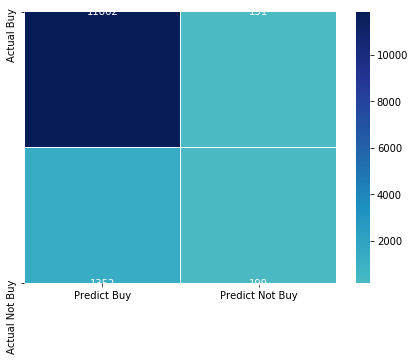

In [77]:
confumat_test_LR = metrics.confusion_matrix(y_test,y_predict)
print("Confusion Matrix")
cust_data_lr = pd.DataFrame(confumat_test_LR , index = [i for i in ["Actual Buy","Actual Not Buy"]], 
                            columns = [i for i in ["Predict Buy","Predict Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(cust_data_lr, fmt="d", linewidths=.5, center=600, cmap="YlGnBu", annot=True)

In [78]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Classification Model':['Logistic Regression'], 'Accuracy': accuracy_LR},index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Classification Model', 'Accuracy']]
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192


###  KNN Model

In [79]:
# Check acuracy of the model starting with k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

84.44 %


In [80]:
# Check acuracy of the model starting with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

87.67 %


In [81]:
# Check acuracy of the model starting with k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

88.37 %


In [82]:
# Check acuracy of the model starting with k=7
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

88.64 %


In [83]:
# Check acuracy of the model starting with k=9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

88.69 %


In [84]:
# Check acuracy of the model starting with k=11
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
s1=accuracy_score(y_test, y_pred)
print(round(s1*100,2),'%')

88.66 %


### Hyper Parameter Tuning with Optimal K value

In [85]:
# creating odd list of K for KNN
myList = list(range(1,11))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [86]:
# Empty list that will hold accuracy scores
ac_scores = []

# performing accuracy metrics for values from 1,3,5....10
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# Misclassification error:
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


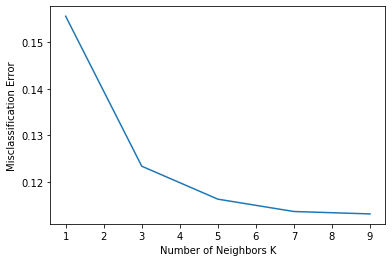

In [87]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

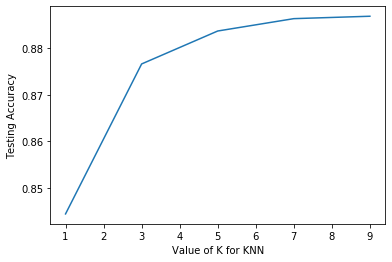

In [88]:
# plot the relationship between K and testing accuracy
plt.plot(neighbors, ac_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [89]:
# KNN Model Evaluation with optimum k=9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy_KNN=metrics.accuracy_score(y_test, y_predict)
print('Accuracy KNN: ',accuracy_KNN)
print('Confusion Matrix KNN: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report KNN: \n',metrics.classification_report(y_test, y_predict))

Accuracy KNN:  0.8869065172515482
Confusion Matrix KNN: 
 [[11751   262]
 [ 1272   279]]
Classification report KNN: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.52      0.18      0.27      1551

    accuracy                           0.89     13564
   macro avg       0.71      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



Confusion Matrix


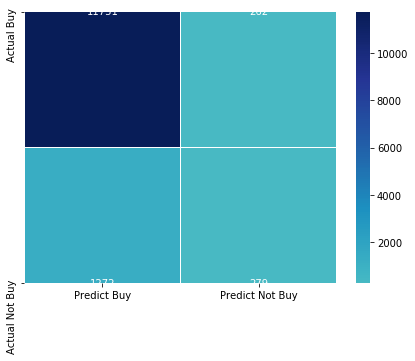

In [90]:
confumat_test_KNN = metrics.confusion_matrix(y_test,y_predict)
print("Confusion Matrix")
cust_data_lr = pd.DataFrame(confumat_test_KNN, index = [i for i in ["Actual Buy","Actual Not Buy"]], 
                            columns = [i for i in ["Predict Buy","Predict Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(cust_data_lr, fmt="d", linewidths=.5, center=600, cmap="YlGnBu", annot=True)

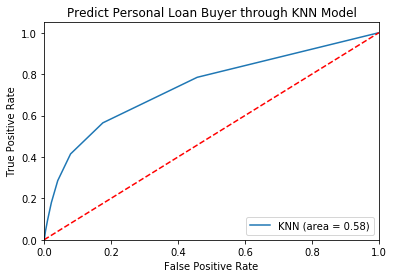

In [91]:
#AUC ROC curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predict Personal Loan Buyer through KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

* The AUC curve certainly shows this model performs average eventhough the accuracy is 89%

In [92]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_KNN = pd.DataFrame({'Classification Model':['KNN Model'], 'Accuracy': accuracy_KNN},index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_KNN])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907


###  Gaussian Navie Bayes classifier

In [93]:
GausNB = GaussianNB() #Build the model or instantiate learning model
GausNB.fit(X_train, y_train) #Fitting the data and training the Model

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
y_test_GNB = GausNB.predict(X_test)
accuracy_GNB=metrics.accuracy_score(y_test, y_test_GNB)
print('Accuracy KNN: ',accuracy_GNB)
print('Confusion Matrix GNB: \n',metrics.confusion_matrix(y_test, y_test_GNB))
print('Classification report GNB: \n',metrics.classification_report(y_test, y_test_GNB))

Accuracy KNN:  0.8464317310527868
Confusion Matrix GNB: 
 [[10929  1084]
 [  999   552]]
Classification report GNB: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     12013
           1       0.34      0.36      0.35      1551

    accuracy                           0.85     13564
   macro avg       0.63      0.63      0.63     13564
weighted avg       0.85      0.85      0.85     13564



In [95]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_GNB = pd.DataFrame({'Classification Model':['Gaussian Navie Bayes'], 'Accuracy': accuracy_GNB},index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_GNB])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432


###  Support Vector Machine

In [96]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model=svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
print('Accuracy SVM: ',accuracy_SVM)

Accuracy SVM:  0.886685343556473


In [97]:
svc_model = SVC(kernel='rbf')
svc_model=svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
print('Accuracy SVM: ',accuracy_SVM)

Accuracy SVM:  0.8929519315836036


In [98]:
svc_model = SVC(kernel='sigmoid')
svc_model=svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
print('Accuracy SVM: ',accuracy_SVM)

Accuracy SVM:  0.8328664110881746


In [99]:
svc_model = SVC(kernel='poly')
svc_model=svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
print('Accuracy SVM: ',accuracy_SVM)

Accuracy SVM:  0.8943526983190799


* SVM Model with Kernel 'Poly' performs best in this case

In [100]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVM = pd.DataFrame({'Classification Model':['Support Vector Machine'], 'Accuracy': accuracy_SVM},index={'4'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVM])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353


### Decision Tree Model

In [101]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree = dTree.fit(X_train, y_train)
dTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [102]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8730462990268357


In [103]:
y_predict_DT = dTree.predict(X_test)
accuracy_DT=metrics.accuracy_score(y_test, y_predict_DT)

In [104]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT_Overfit = pd.DataFrame({'Classification Model':['Full Blown Decision Tree'], 'Accuracy': accuracy_DT},index={'5'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT_Overfit])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046


In [105]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.096916
education          0.021674
default            0.001671
balance            0.119576
housing            0.024494
loan               0.007614
contact            0.020826
day                0.086215
duration           0.248483
campaign           0.032824
pdays              0.067149
previous           0.013707
poutcome           0.058881
job_admin.         0.008258
job_blue-collar    0.007680
job_entrepreneur   0.003652
job_housemaid      0.002838
job_management     0.011936
job_retired        0.002549
job_self-employed  0.004367
job_services       0.008483
job_student        0.004338
job_technician     0.013557
job_unemployed     0.005134
job_unknown        0.001166
marital_divorced   0.008014
marital_married    0.007638
marital_single     0.007201
month_apr          0.011383
month_aug          0.006430
month_dec          0.004453
month_feb          0.005785
month_jan          0.004277
month_jul          0.006400
month_jun          0

##### Observations:
*  Age, Balance and Duration are the important features in the tree building - Gini importance

### Regularized Decision Tree - Reducing over fitting

In [106]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8869719088697191
0.8842524329106458


In [107]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8869719088697191
0.8842524329106458


In [108]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8992321547066072
0.8958271896195813


In [109]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9077953676493823
0.8951636685343557


In [110]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9190128606187
0.893394278973754


In [111]:
#Best Max Depth = 5
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8992321547066072
0.8958271896195813


#### Visualizing the Decision Tree

In [112]:
Credit_Tree_File = open('c:\credit_tree_R.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = ['0','1'])
Credit_Tree_File.close()

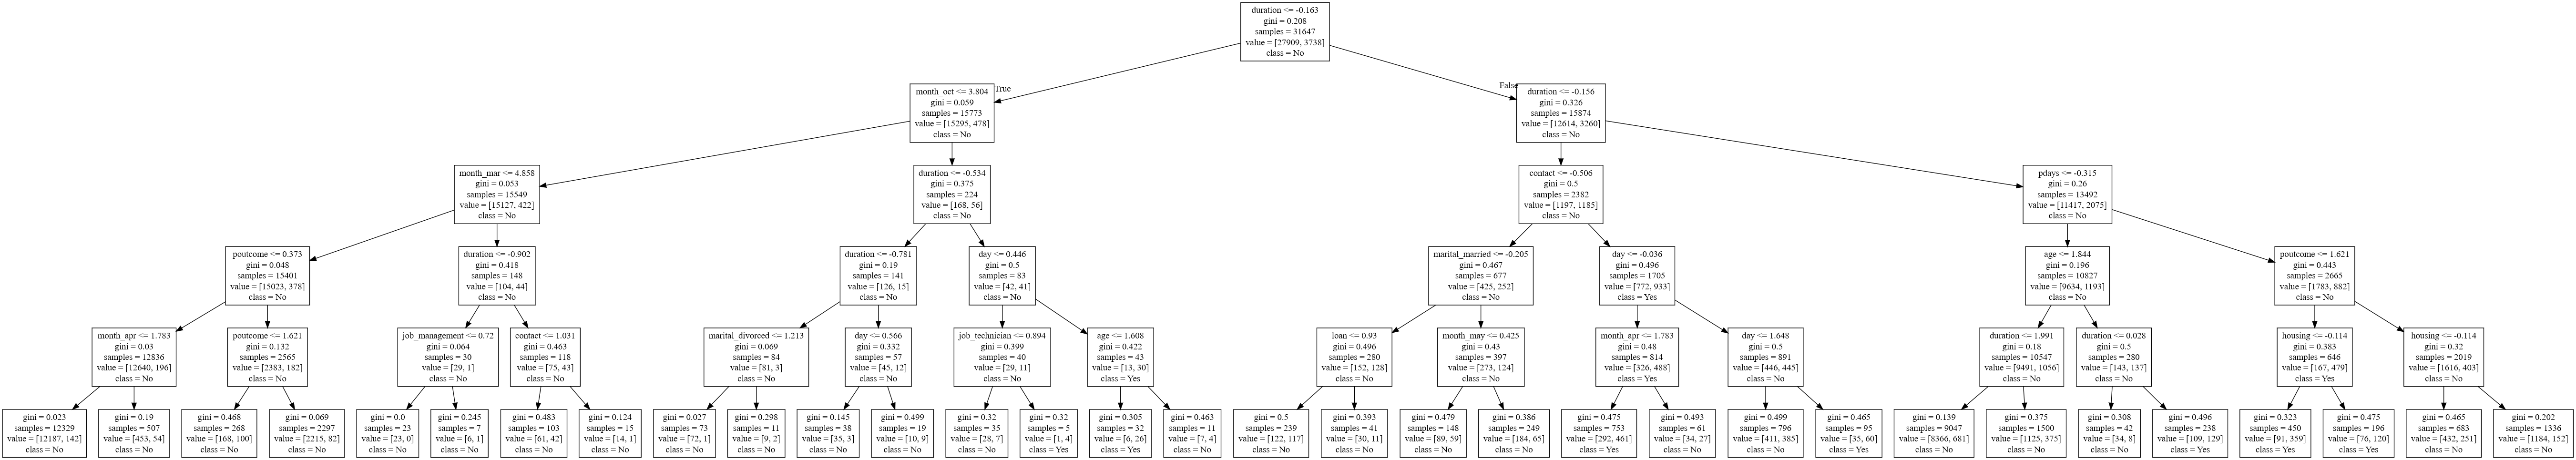

In [113]:
# Generated using .dot file from http://webgraphviz.com/ to print tree view 
Image("c:\cust_over.png")

In [114]:
y_predict_DT = dTreeR.predict(X_test)
accuracy_DTR=metrics.accuracy_score(y_test, y_predict_DT)
print('Accuracy Regularized Decision Tree: ',accuracy_DTR)
print('Confusion Matrix Regularized Decision Tree: \n',metrics.confusion_matrix(y_test, y_predict_DT))
print('Classification report  Regularized Decision Tree: \n',metrics.classification_report(y_test, y_predict_DT))

Accuracy Regularized Decision Tree:  0.8958271896195813
Confusion Matrix Regularized Decision Tree: 
 [[11866   147]
 [ 1266   285]]
Classification report  Regularized Decision Tree: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



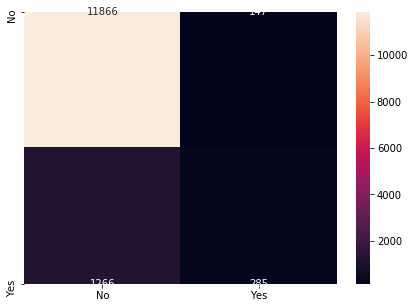

In [115]:
DT_Confmat=metrics.confusion_matrix(y_test, y_predict_DT, labels=[0, 1])

DT_Confmat_df = pd.DataFrame(DT_Confmat, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(DT_Confmat_df, annot=True ,fmt='g')

##### After trying with Gini impurity and trying with "entropy" for the information gain

In [116]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8903529560463868
0.8885284576820996


#### Visualizing the Decision Tree

In [117]:
Credit_Tree_File = open('c:\credit_tree_entropy.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = ['0','1'])
Credit_Tree_File.close()

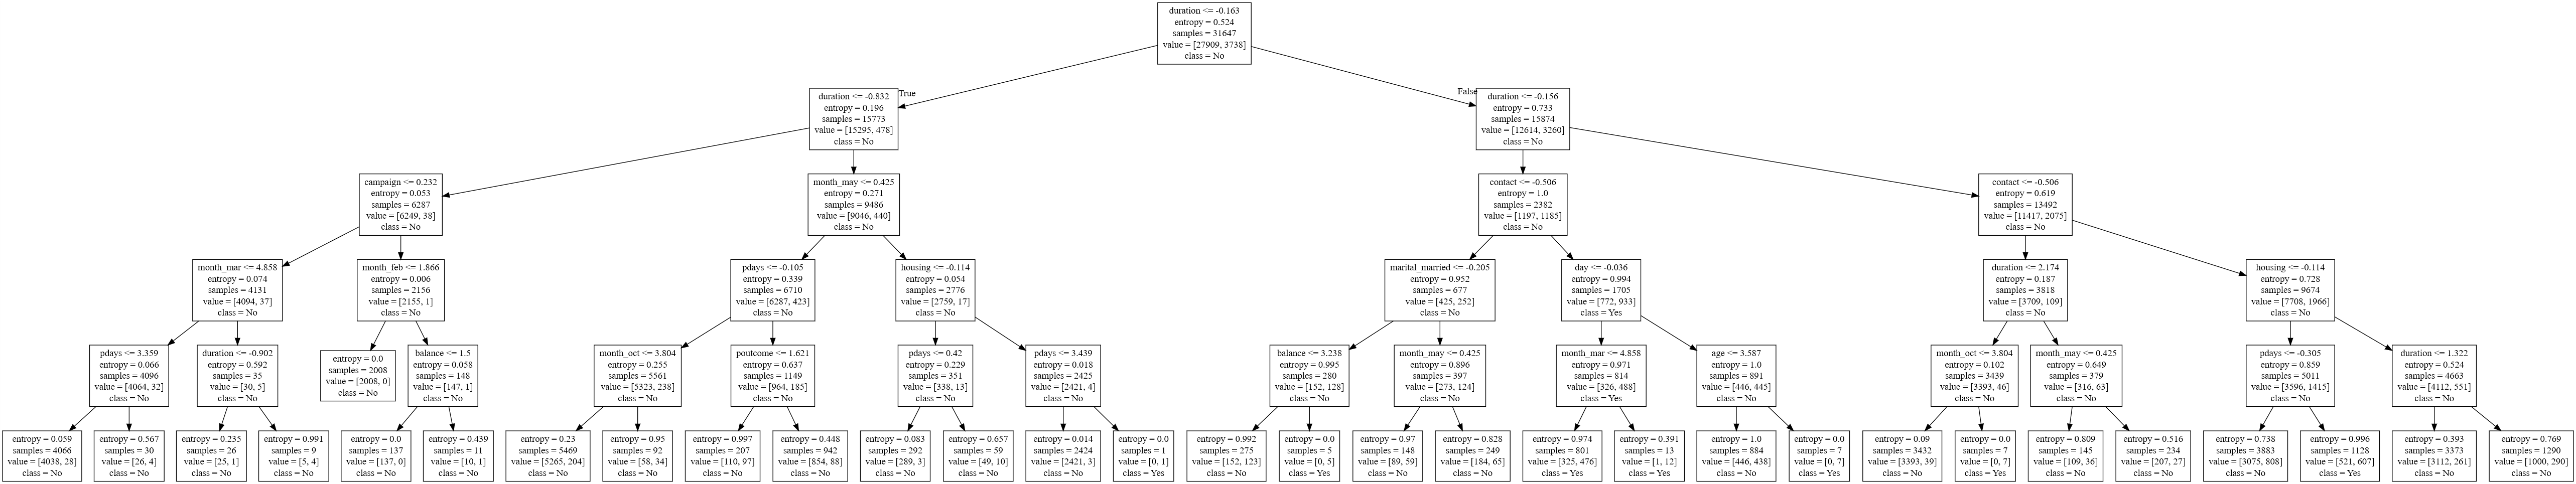

In [118]:
# Generated using .dot file from http://webgraphviz.com/ to print tree view 
Image("c:\cust_entropy.png")

In [119]:
y_predict_DT = dTreeR.predict(X_test)
accuracy_DTR=metrics.accuracy_score(y_test, y_predict_DT)
print('Accuracy Regularized Decision Tree: ',accuracy_DTR)
print('Confusion Matrix Regularized Decision Tree: \n',metrics.confusion_matrix(y_test, y_predict_DT))
print('Classification report  Regularized Decision Tree: \n',metrics.classification_report(y_test, y_predict_DT))

Accuracy Regularized Decision Tree:  0.8885284576820996
Confusion Matrix Regularized Decision Tree: 
 [[11767   246]
 [ 1266   285]]
Classification report  Regularized Decision Tree: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.54      0.18      0.27      1551

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [120]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT_entropy = pd.DataFrame({'Classification Model':['Regularized Decision Tree'], 'Accuracy': accuracy_DTR},index={'6'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT_entropy])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528


### Ensemble Model - Bagging

In [121]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
bgcl

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [122]:
y_predict_bagging = bgcl.predict(X_test)
accuracy_bagging=metrics.accuracy_score(y_test, y_predict_bagging)
print('Accuracy Ensemble Model - Bagging: ',accuracy_bagging)
print('Confusion Matrix Ensemble Model - Bagging: \n',metrics.confusion_matrix(y_test, y_predict_bagging))
print('Classification report  Ensemble Model - Bagging: \n',metrics.classification_report(y_test, y_predict_bagging))

Accuracy Ensemble Model - Bagging:  0.8996608670008847
Confusion Matrix Ensemble Model - Bagging: 
 [[11700   313]
 [ 1048   503]]
Classification report  Ensemble Model - Bagging: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.32      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [123]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT_bagging = pd.DataFrame({'Classification Model':['Ensemble Model Bagging'], 'Accuracy': accuracy_bagging},index={'7'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT_bagging])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528
7,Ensemble Model Bagging,0.899661


### Ensemble Model - AdaBoosting

In [124]:
abcl = AdaBoostClassifier(base_estimator=dTree, n_estimators=10,random_state=1)
abcl = abcl.fit(X_train, y_train)
abcl

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=1,
                             

In [125]:
y_predict_AdaBoosting= bgcl.predict(X_test)
accuracy_AdaBoosting=metrics.accuracy_score(y_test, y_predict_AdaBoosting)
print('Accuracy Ensemble Model - AdaBoosting: ',accuracy_AdaBoosting)
print('Confusion Matrix Ensemble Model - AdaBoosting: \n',metrics.confusion_matrix(y_test, y_predict_AdaBoosting))
print('Classification report  Ensemble Model - AdaBoosting: \n',metrics.classification_report(y_test, y_predict_AdaBoosting))

Accuracy Ensemble Model - AdaBoosting:  0.8996608670008847
Confusion Matrix Ensemble Model - AdaBoosting: 
 [[11700   313]
 [ 1048   503]]
Classification report  Ensemble Model - AdaBoosting: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.32      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [126]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_temp_AdaBoosting = pd.DataFrame({'Classification Model':['Ensemble Model AdaBoosting'], 'Accuracy': accuracy_AdaBoosting},index={'8'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_temp_AdaBoosting])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528
7,Ensemble Model Bagging,0.899661
8,Ensemble Model AdaBoosting,0.899661


### Ensemble Model - GradientBoost

In [127]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)
gbcl

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [128]:
y_predict_GradientBoost = gbcl.predict(X_test)
accuracy_GradientBoost=metrics.accuracy_score(y_test, y_predict_GradientBoost)
print('Accuracy Ensemble Model - GradientBoost: ',accuracy_GradientBoost)
print('Confusion Matrix Ensemble Model - GradientBoost: \n',metrics.confusion_matrix(y_test, y_predict_GradientBoost))
print('Classification report  Ensemble Model - GradientBoost: \n',metrics.classification_report(y_test, y_predict_GradientBoost))

Accuracy Ensemble Model - GradientBoost:  0.8952373930993807
Confusion Matrix Ensemble Model - GradientBoost: 
 [[11919    94]
 [ 1327   224]]
Classification report  Ensemble Model - GradientBoost: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.70      0.14      0.24      1551

    accuracy                           0.90     13564
   macro avg       0.80      0.57      0.59     13564
weighted avg       0.88      0.90      0.86     13564



In [129]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_temp_GradientBoost = pd.DataFrame({'Classification Model':['Ensemble Model GradientBoost'], 'Accuracy': accuracy_GradientBoost},index={'9'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_temp_GradientBoost])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528
7,Ensemble Model Bagging,0.899661
8,Ensemble Model AdaBoosting,0.899661
9,Ensemble Model GradientBoost,0.895237


### Ensemble RandomForest Classifier

In [130]:
rfcl = RandomForestClassifier(n_estimators = 50,random_state=1 )
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### RandomForest with Hyper Parameter Tuning using GridSearchCV

In [132]:
rf_gs = RandomForestClassifier()

n_estimators = [10, 50, 100, 200]
max_depth = [5, 10, 20]

#define grid search
grid = dict(n_estimators = n_estimators, max_depth = max_depth)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state = 1)

rf_grid_search = GridSearchCV(rf_gs, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0)
rf_grid_search = rf_grid_search.fit(X_train, y_train)
rf_grid_search

print(rf_grid_search.best_estimator_)
print(rf_grid_search.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'max_depth': 20, 'n_estimators': 100}


In [ ]:
rfcl = RandomForestClassifier(n_estimators = 100,max_depth = 20, random_state=1 )
rfcl = rfcl.fit(X_train, y_train)
rfcl

In [133]:
y_predict_RandomForest = rfcl.predict(X_test)
accuracy_RandomForest=metrics.accuracy_score(y_test, y_predict_RandomForest)
accuracy_RandomForest

0.9015039811265113

In [155]:
print('Accuracy Ensemble Model - RandomForest Classifier: ',accuracy_RandomForest)
print('Confusion Matrix Ensemble Model - RandomForest Classifier: \n',metrics.confusion_matrix(y_test, y_predict_RandomForest))
print('Classification report  Ensemble Model - RandomForest Classifier: \n',metrics.classification_report(y_test, y_predict_RandomForest))

Accuracy Ensemble Model - RandomForest Classifier:  0.9015039811265113
Confusion Matrix Ensemble Model - RandomForest Classifier: 
 [[11824   189]
 [ 1147   404]]
Classification report  Ensemble Model - RandomForest Classifier: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     12013
           1       0.68      0.26      0.38      1551

    accuracy                           0.90     13564
   macro avg       0.80      0.62      0.66     13564
weighted avg       0.89      0.90      0.88     13564



In [134]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_temp_RandomForest = pd.DataFrame({'Classification Model':['Ensemble Model RandomForest Classifier'], 'Accuracy': accuracy_RandomForest},index={'10'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_temp_RandomForest])
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528
7,Ensemble Model Bagging,0.899661
8,Ensemble Model AdaBoosting,0.899661
9,Ensemble Model GradientBoost,0.895237
10,Ensemble Model RandomForest Classifier,0.901504


In [ ]:
#AUC ROC curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predict Personal Loan Buyer through KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

## Compare performances of all the models

In [145]:
Accuracy_Matrix = pd.DataFrame(Accuracy_Matrix)
Accuracy_Matrix

,Classification Model,Accuracy
1,Logistic Regression,0.889192
2,KNN Model,0.886907
3,Gaussian Navie Bayes,0.846432
4,Support Vector Machine,0.894353
5,Full Blown Decision Tree,0.873046
6,Regularized Decision Tree,0.888528
7,Ensemble Model Bagging,0.899661
8,Ensemble Model AdaBoosting,0.899661
9,Ensemble Model GradientBoost,0.895237
10,Ensemble Model RandomForest Classifier,0.901504


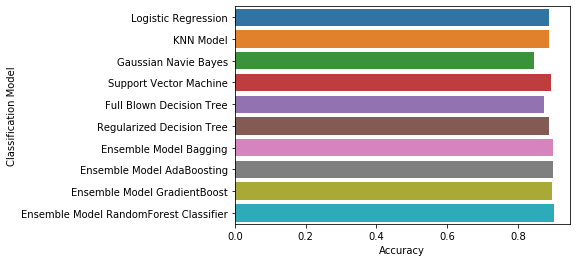

In [154]:
ax = sns.barplot(y="Classification Model", x="Accuracy", data=Accuracy_Matrix,  ci=200)

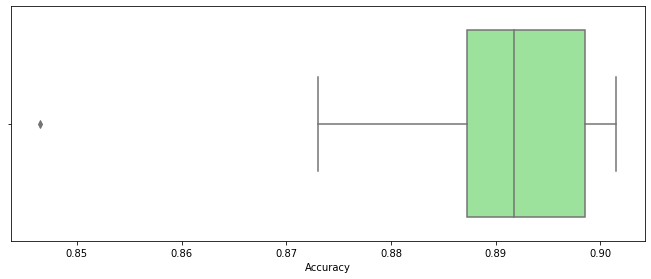

In [150]:
plt.figure(figsize= (25,25))

plt.subplot(5,2,1)
sns.boxplot(x= Accuracy_Matrix.Accuracy, color='lightgreen')

## Conclusion

As the intend here is to predict binary wheather or not a customer will subscribe Term Deposit. For this kind of decisioning model how many are correctly predicted out of all the ones which are predicted positive takes precedence. Eventhough both majority of the classification models have Accuracy at the same range. The best suitable model in this use case will be RandomForest due to the below reason -
1. RandomForest model scored with highest Accuracy slightly more than 90%
2. RandomForest model scored with highest F1 Score 38%
3. RandomForest model scored with higher precision 68% which is slighly lesser than GradientBoost (70%) but higher than all other models
4. RandomForest model is an Ensemble model and hense considered multiple variation of Desition Trees already
5. Overall RandomForest model performed pretty well on this data set

### Hence can be concluded in this case The RandomForest Classifier Model is the best suitable model for predicting the likelyhood of customers to subscibe Term Deposit.

#                                                Thank You